# Problems to be solved
#### 1. Customers from which city have high churn rate?
#### 2. Which offer reduces the churn rate most.
#### 3. What are the major reasons for the customer churn and how can we reduce it.

# Information on Dataset

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data = pd.read_csv("E:/My projects/telco.csv")

In [4]:
data.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80       1,024.10   
2                        0                       203.94       1,910.88   
3                        0                       494.00       2,995.07   
4                        0                       234.21       3,102.36   

   Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                   3          Churned         Yes          91  5433   
1                   3          Churned         Yes          69  5302   
2                   2          Churned         Yes          81  3179   
3                   2          Churned         Yes          88  5337   
4                   2          Churned         Yes          67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 50 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [6]:
data.describe()

Age  Number of Dependents  Zip Code  Latitude  Longitude  \
count 7,043.00              7,043.00  7,043.00  7,043.00   7,043.00   
mean     46.51                  0.47 93,486.07     36.20    -119.76   
std      16.75                  0.96  1,856.77      2.47       2.15   
min      19.00                  0.00 90,001.00     32.56    -124.30   
25%      32.00                  0.00 92,101.00     33.99    -121.79   
50%      46.00                  0.00 93,518.00     36.21    -119.60   
75%      60.00                  0.00 95,329.00     38.16    -117.97   
max      80.00                  9.00 96,150.00     41.96    -114.19   

       Population  Number of Referrals  Tenure in Months  \
count    7,043.00             7,043.00          7,043.00   
mean    22,139.60                 1.95             32.39   
std     21,152.39                 3.00             24.54   
min         11.00                 0.00              1.00   
25%      2,344.00                 0.00              9.00   
50%     17,554.00                 0.00             29.00   
75%     36,125.00                 3.00             55.00   
max    105,285.00                11.00             72.00   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           7,043.00                 7,043.00   
mean                               22.96                    20.52   
std                                15.45                    20.42   
min                                 0.00                     0.00   
25%                                 9.21                     3.00   
50%                                22.89                    17.00   
75%                                36.39                    27.00   
max                                49.99                    85.00   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count        7,043.00       7,043.00       7,043.00                  7,043.00   
mean            64.76       2,280.38           1.96                      6.86   
std             30.09       2,266.22           7.90                     25.10   
min             18.25          18.80           0.00                      0.00   
25%             35.50         400.15           0.00                      0.00   
50%             70.35       1,394.55           0.00                      0.00   
75%             89.85       3,786.60           0.00                      0.00   
max            118.75       8,684.80          49.79                    150.00   

       Total Long Distance Charges  Total Revenue  Satisfaction Score  \
count                     7,043.00       7,043.00            7,043.00   
mean                        749.10       3,034.38                3.24   
std                         846.66       2,865.20                1.20   
min                           0.00          21.36                1.00   
25%                          70.55         605.61                3.00   
50%                         401.44       2,108.64                3.00   
75%                       1,191.10       4,801.15                4.00   
max                       3,564.72      11,979.34                5.00   

       Churn Score     CLTV  
count     7,043.00 7,043.00  
mean         58.51 4,400.30  
std          21.17 1,183.06  
min           5.00 2,003.00  
25%          40.00 3,469.00  
50%          61.00 4,527.00  
75%          75.50 5,380.50  
max          96.00 6,500.00

In [7]:
data.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [8]:
data.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

In [30]:
import pandas as pd

# Calculate correlations
correlations = data.corr()

# Show correlation with the target variable 'Churn'
print(correlations['Churn Label'].sort_values(ascending=False))

Churn Label                          1.00
Churn Score                          0.66
Monthly Charge                       0.19
Age                                  0.12
Population                           0.05
Avg Monthly GB Download              0.05
Avg Monthly Long Distance Charges    0.01
Total Extra Data Charges             0.01
Total Refunds                       -0.03
CLTV                                -0.13
Total Charges                       -0.20
Number of Dependents                -0.22
Total Revenue                       -0.22
Total Long Distance Charges         -0.22
Number of Referrals                 -0.29
Tenure in Months                    -0.35
Satisfaction Score                  -0.75
Name: Churn Label, dtype: float64


[1 0]
Churn rate by city:
City
Eldridge          1.00
Smith River       1.00
Twain             1.00
Johannesburg      1.00
Riverbank         1.00
                  ... 
Glenn             0.00
Glenhaven         0.00
San Quentin       0.00
North Highlands   0.00
Laguna Hills      0.00
Name: Churn Label, Length: 1106, dtype: float64


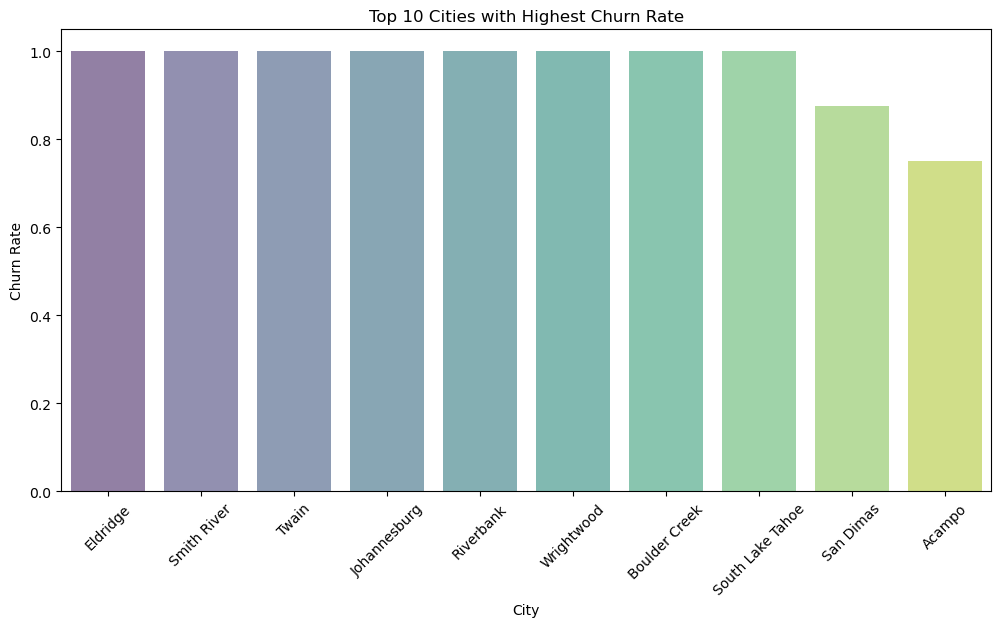

Churn rate by offer:
Offer
Offer E   0.53
None      0.27
Offer D   0.27
Offer C   0.23
Offer B   0.12
Offer A   0.07
Name: Churn Label, dtype: float64


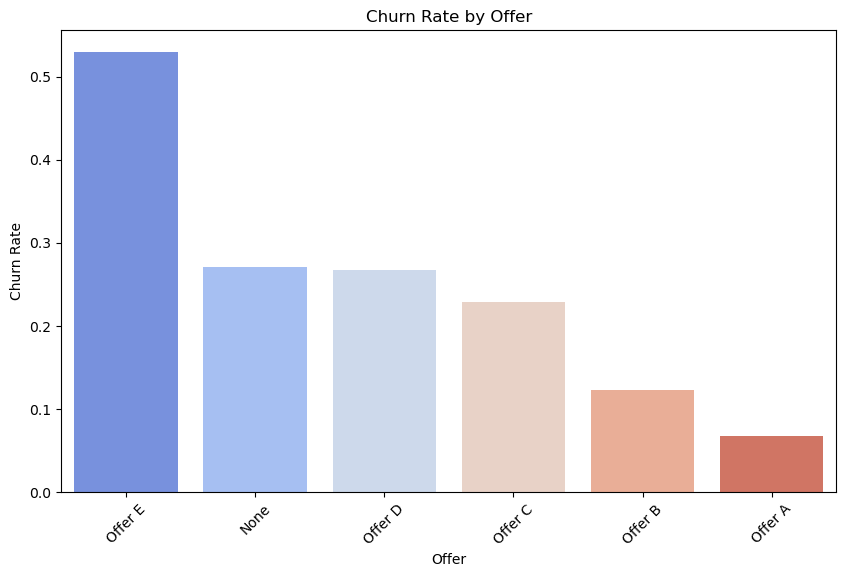

Top churn reasons:
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
N

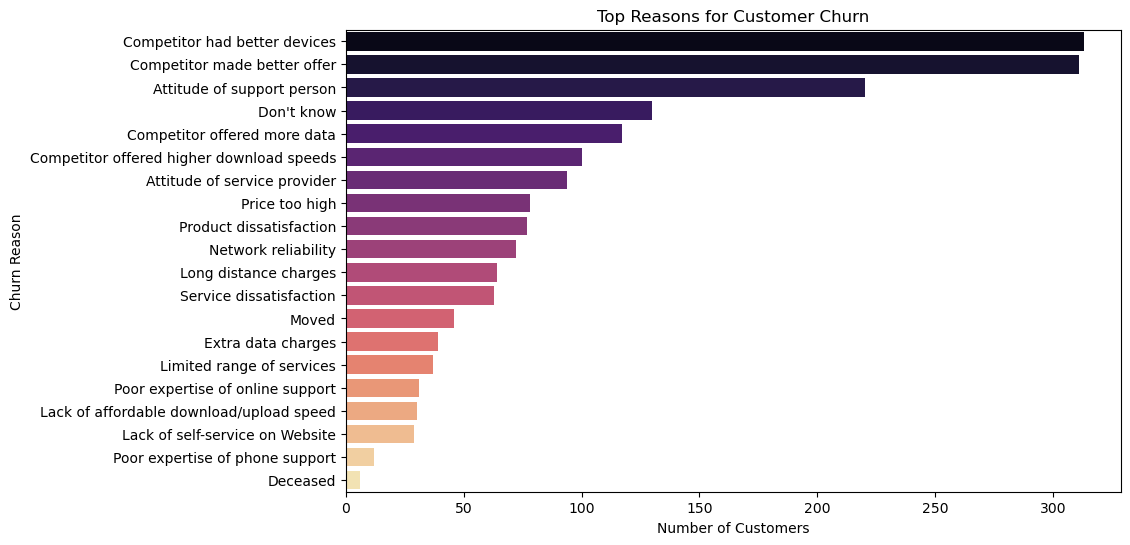

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Churn Label' column to numeric
data['Churn Label'] = data['Churn Label'].map({'Yes': 1, 'No': 0})

# Verify conversion
print(data['Churn Label'].unique())  # Should output: array([1, 0])

# Sort churn rates by city
churn_rate_by_city = data.groupby('City')['Churn Label'].mean().sort_values(ascending=False)
print("Churn rate by city:")
print(churn_rate_by_city)

# Get the top 10 cities with the highest churn rate
top_10_cities = churn_rate_by_city.head(10)

# Plot for Top 10 Cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis', alpha=0.6)
plt.xticks(rotation=45)
plt.title('Top 10 Cities with Highest Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('City')
plt.show()

# 2. Which offer reduces the churn rate most?
churn_rate_by_offer = data.groupby('Offer')['Churn Label'].mean().sort_values(ascending=False)
print("Churn rate by offer:")
print(churn_rate_by_offer)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_offer.index, y=churn_rate_by_offer.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Churn Rate by Offer')
plt.ylabel('Churn Rate')
plt.xlabel('Offer')
plt.show()

# 3. What are the major reasons for customer churn?
churn_reason_counts = data['Churn Reason'].value_counts()
print("Top churn reasons:")
print(churn_reason_counts)

plt.figure(figsize=(10, 6))
sns.barplot(y=churn_reason_counts.index, x=churn_reason_counts.values, palette='magma')
plt.title('Top Reasons for Customer Churn')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.show()

#### *Insights*
1. The following cities have been identified as having the highest customer churn rates:
Eldridge          
Smith River       
Twain             
Johannesburg      
Riverbank <br>
Wrightwood <br>
Boulder Creek <br>
South Lake Tahoe <br>
San Dimas <br>
Acampo <br>
2.Two specific promotional offers have been found to significantly reduce the churn rate:

* Offer A: Reduces churn by 93%.
* Offer B: Reduces churn by 88%.

3. The primary reason customers are leaving is due to the perception that competitors provide better devices. Secondary reasons include:
* Competitor made a better offer.
* Negative customer support experience, specifically related to the attitude of support personnel.

In [10]:
''' Since some of these columns have only 1 unique value and 
some of them are not required for this analysis 
so we are removing them from the dataset '''

columns_to_drop = ['Country', 'State', 'Quarter', 'Zip Code', 'Latitude', 'Longitude','City']
existing_columns = data.columns.intersection(columns_to_drop)
data = data.drop(existing_columns, axis=1)

Churn Label                          1.00
Churn Score                          0.66
Monthly Charge                       0.19
Age                                  0.12
Population                           0.05
Avg Monthly GB Download              0.05
Avg Monthly Long Distance Charges    0.01
Total Extra Data Charges             0.01
Total Refunds                       -0.03
CLTV                                -0.13
Total Charges                       -0.20
Number of Dependents                -0.22
Total Revenue                       -0.22
Total Long Distance Charges         -0.22
Number of Referrals                 -0.29
Tenure in Months                    -0.35
Satisfaction Score                  -0.75
Name: Churn Label, dtype: float64


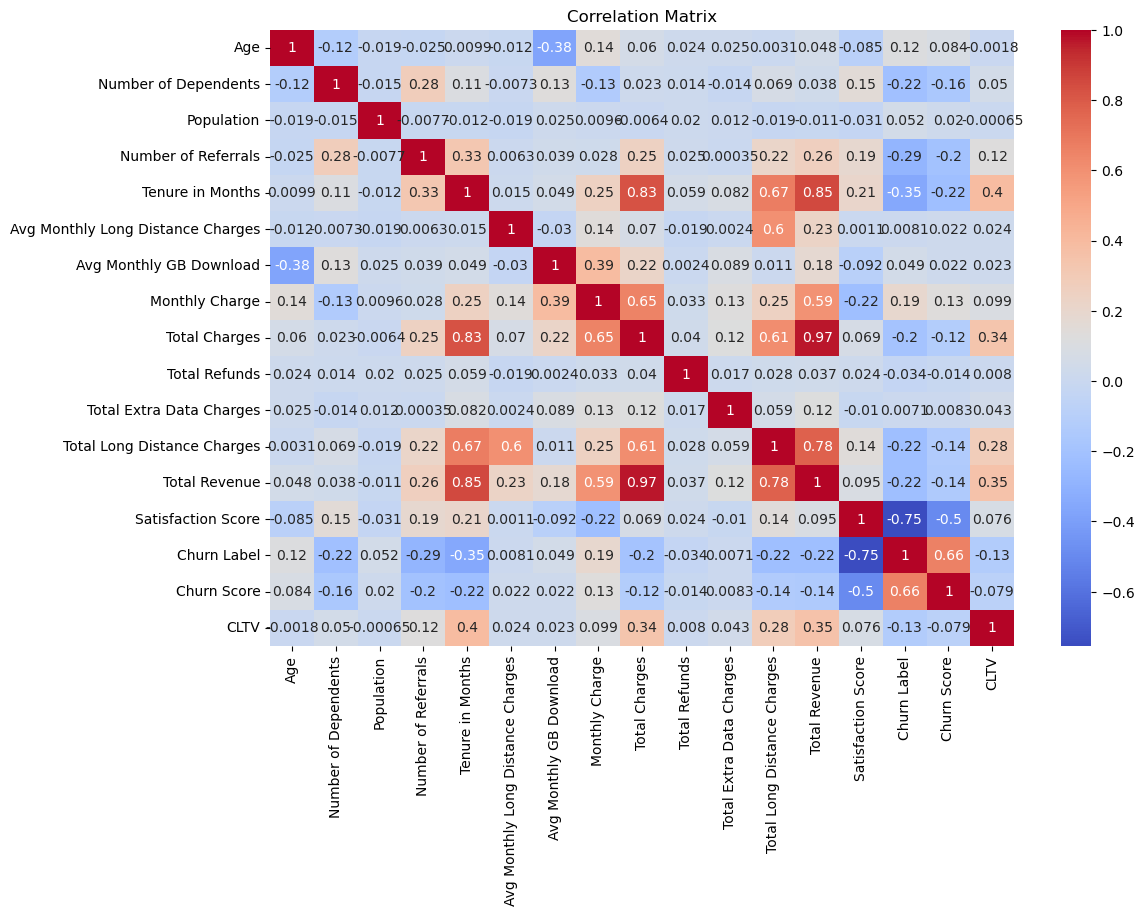

In [11]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Print correlations with the target variable 'Churn Label'
print(corr_matrix['Churn Label'].sort_values(ascending=False))

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### *Insights*
1. Churn label is highly negatively correlated to satisfaction score which makes sense as if the customer is satisfied then he won't leave the company.
2. Churn score and churn label are positively correlated.


# Data Preparation

In [12]:
# replacing the null values in the two columns with "not provided/Unknown"

data['Churn Category'].fillna('Unknown', inplace=True)
data['Churn Reason'].fillna('Not Provided', inplace=True)

In [13]:
data.isna().sum().sum()

0

In [14]:
#code taken from github
features_cat = list(data.select_dtypes(exclude = ['int64','float64']))
features_num = list(data.select_dtypes(include = ['int64','float64']))

In [32]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convert categorical variables to numeric using LabelEncoder for correlation analysis
encoder = LabelEncoder()
data_encoded = data.copy()
for column in features_cat:
    data_encoded[column] = encoder.fit_transform(data[column])

# Calculate correlations again
correlations = data_encoded.corr()
print(correlations['Churn Label'].sort_values(ascending=False))

Churn Label                          1.00
Churn Score                          0.66
Internet Service                     0.23
Monthly Charge                       0.19
Paperless Billing                    0.19
Unlimited Data                       0.17
Senior Citizen                       0.15
Offer                                0.12
Age                                  0.12
Streaming TV                         0.06
Streaming Movies                     0.06
Population                           0.05
Avg Monthly GB Download              0.05
Streaming Music                      0.05
Multiple Lines                       0.04
Phone Service                        0.01
Avg Monthly Long Distance Charges    0.01
Total Extra Data Charges             0.01
Gender                              -0.01
Total Refunds                       -0.03
Internet Type                       -0.05
Under 30                            -0.05
Device Protection Plan              -0.07
Online Backup                     

In [15]:
features_cat.remove('Customer ID')

In [16]:
data.drop('Customer ID', axis = 1, inplace=True)

In [17]:
# now are going to use ordinarEncoding for columns with cardinatity <= 2
# and for more than that we are going to use OneHotEncoding

feature_series = data[features_cat].nunique().sort_values(ascending=False)
feature_series

Churn Reason              21
Churn Category             6
Offer                      6
Internet Type              4
Customer Status            3
Payment Method             3
Contract                   3
Premium Tech Support       2
Paperless Billing          2
Unlimited Data             2
Streaming Music            2
Streaming Movies           2
Streaming TV               2
Gender                     2
Device Protection Plan     2
Under 30                   2
Online Security            2
Internet Service           2
Multiple Lines             2
Phone Service              2
Referred a Friend          2
Dependents                 2
Married                    2
Senior Citizen             2
Online Backup              2
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Step 1: Identify categorical features based on cardinality
categorical_features = data.select_dtypes(include=['object']).columns
onehot_features = [col for col in categorical_features if data[col].nunique() > 2 and col != 'Churn Label']
label_features = [col for col in categorical_features if data[col].nunique() == 2 and col != 'Churn Label']

# Step 2: Split the data into training and test sets
X = data.drop(columns=['Churn Label'])  # Features
y = data['Churn Label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply One-Hot Encoding to columns with more than 2 unique values
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data only
encoded_train_array = onehot_encoder.fit_transform(X_train[onehot_features])

# Transform the test data using the fitted encoder
encoded_test_array = onehot_encoder.transform(X_test[onehot_features])

# Get the new column names for the one-hot encoded features
encoded_columns = onehot_encoder.get_feature_names_out(onehot_features)

# Convert the encoded arrays to DataFrames
encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoded_columns, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test_array, columns=encoded_columns, index=X_test.index)

# Step 4: Apply Label/Ordinal Encoding to columns with exactly 2 unique values
label_encoders = {}
for col in label_features:
    if col in X_train.columns:  # Ensure the column is in the DataFrame
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le  # Store the label encoder for future use if needed

# Step 5: Drop the original categorical features that were one-hot encoded
X_train = X_train.drop(onehot_features, axis=1)
X_test = X_test.drop(onehot_features, axis=1)

# Join the encoded DataFrames with the original DataFrames
X_train = X_train.join(encoded_train_df)
X_test = X_test.join(encoded_test_df)

# Output the transformed training and test sets
print("Transformed Training Set:")
print(X_train.head(2).T)

print("\nTransformed Test Set:")
print(X_test.head(2).T)


Transformed Training Set:
                                               4626  4192
Gender                                         1.00  0.00
Age                                           43.00 62.00
Under 30                                       0.00  0.00
Senior Citizen                                 0.00  0.00
Married                                        0.00  0.00
...                                             ...   ...
Churn Reason_Poor expertise of online support  0.00  0.00
Churn Reason_Poor expertise of phone support   0.00  0.00
Churn Reason_Price too high                    0.00  0.00
Churn Reason_Product dissatisfaction           0.00  0.00
Churn Reason_Service dissatisfaction           0.00  0.00

[80 rows x 2 columns]

Transformed Test Set:
                                               803   3549
Gender                                         1.00  0.00
Age                                           74.00 55.00
Under 30                                       0.00  0.00


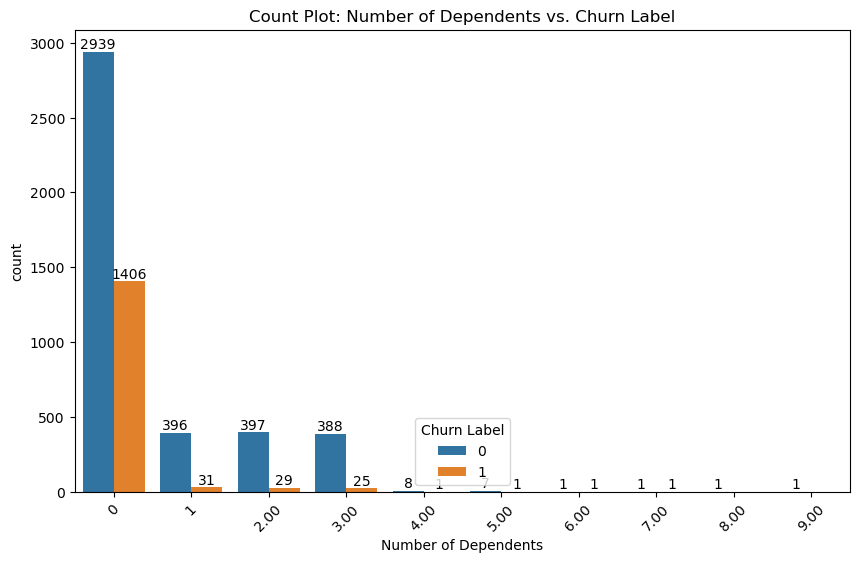

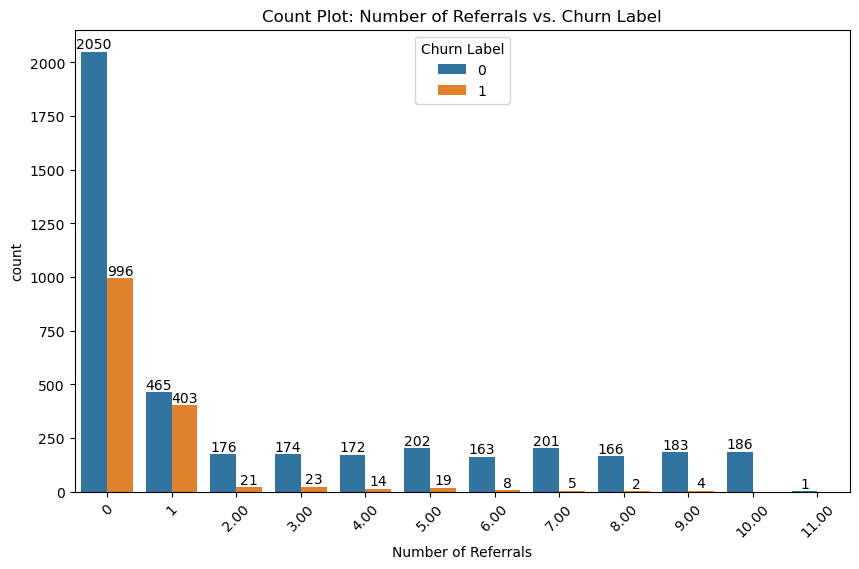

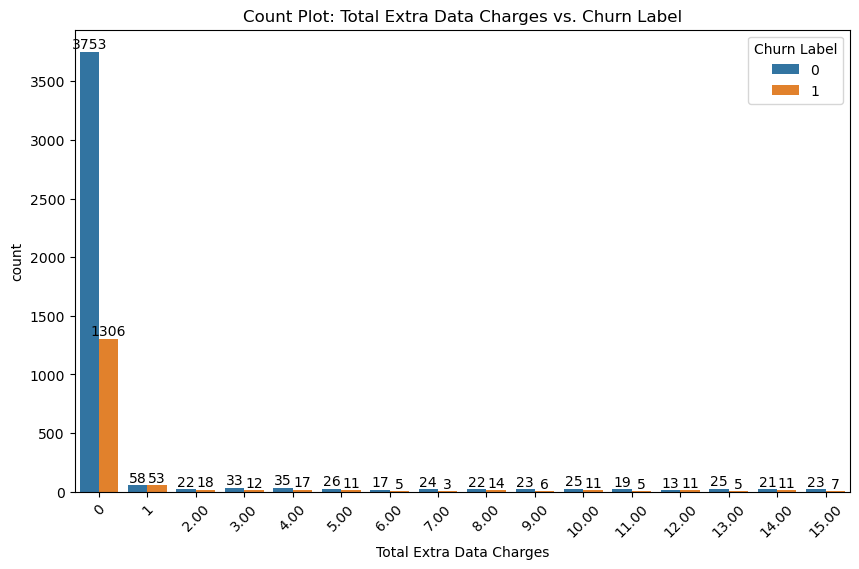

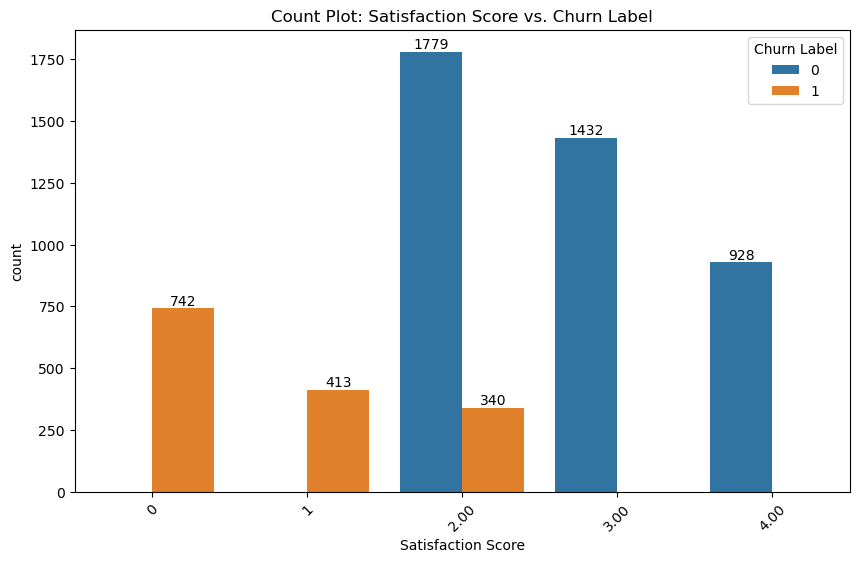

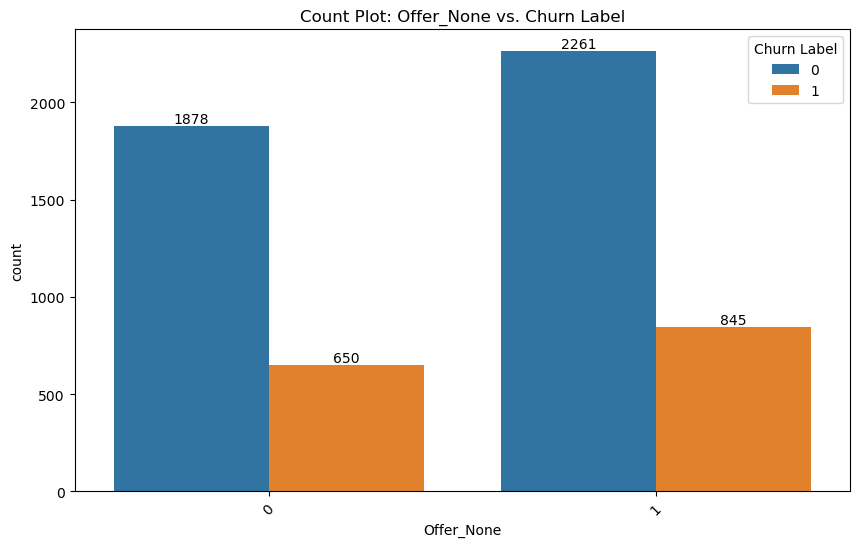

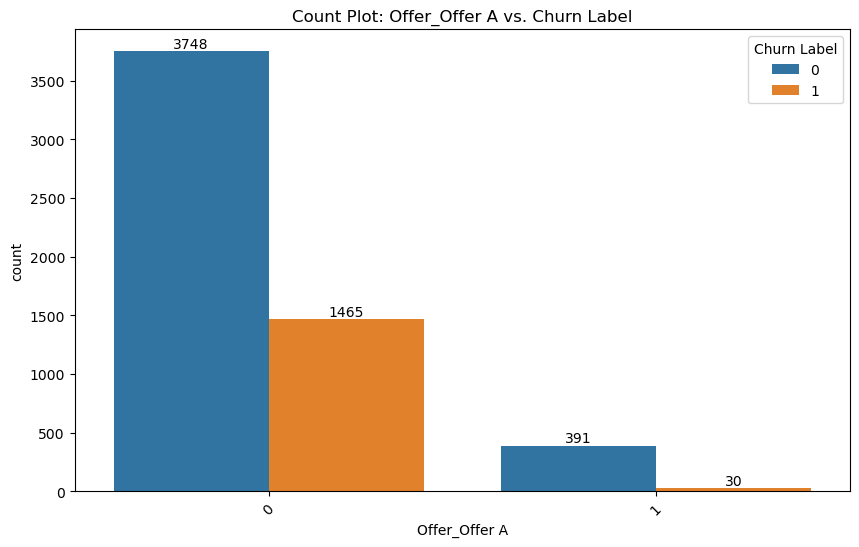

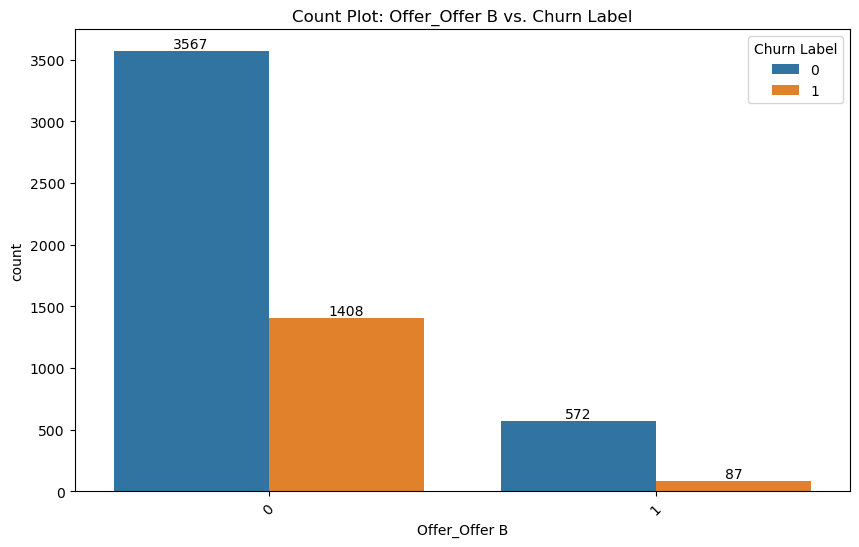

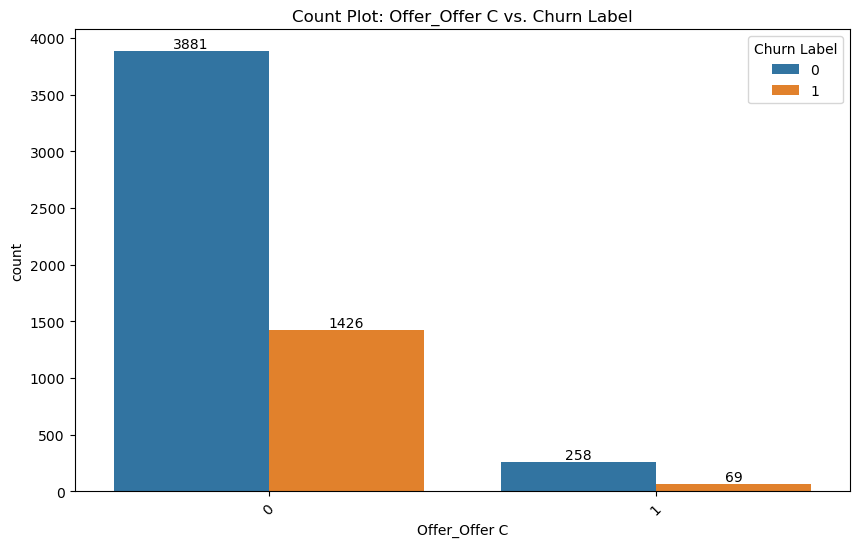

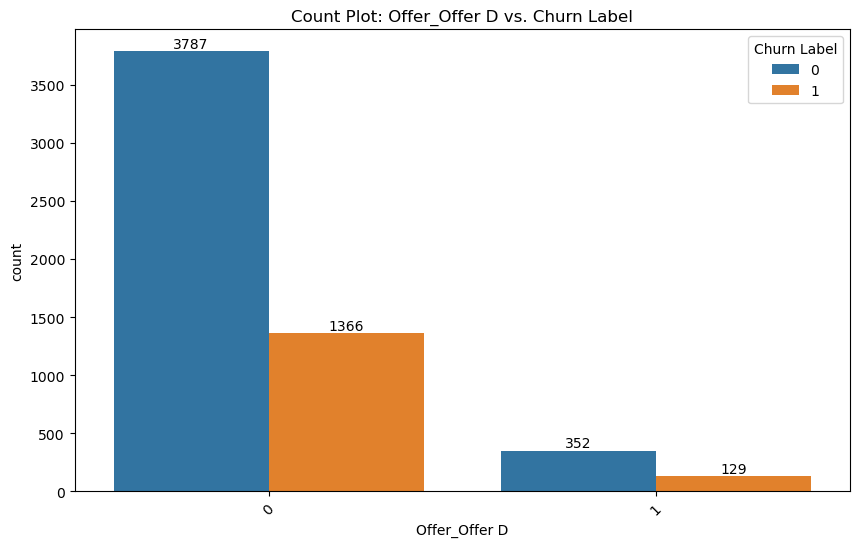

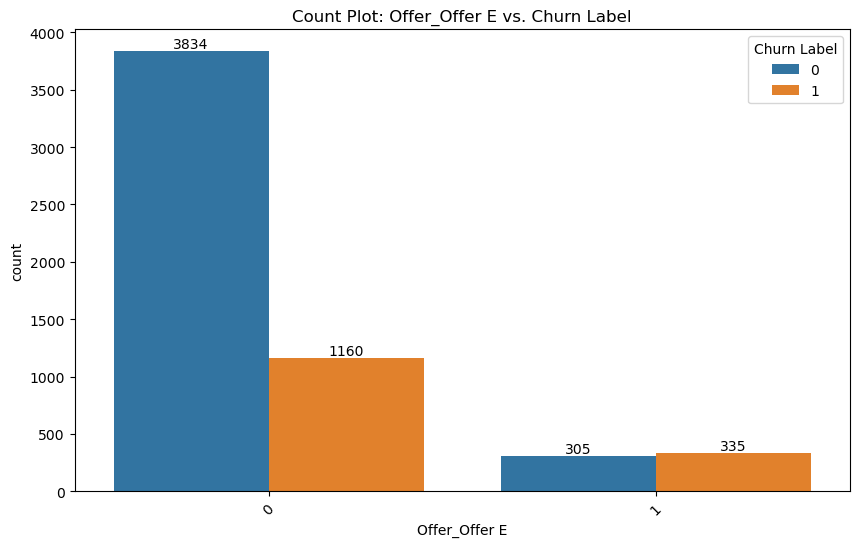

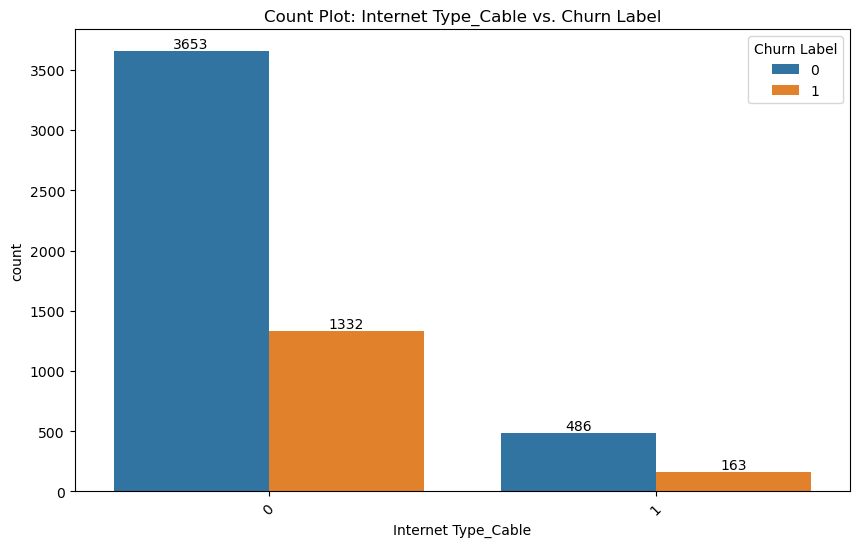

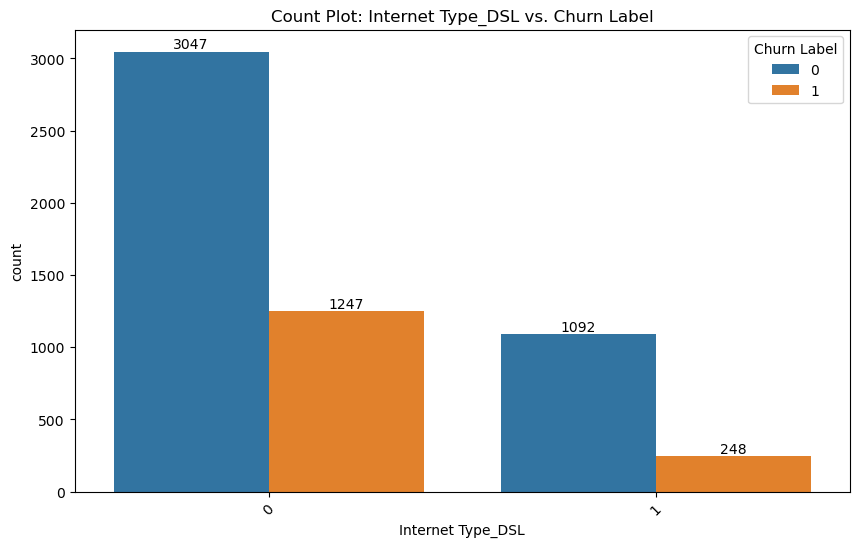

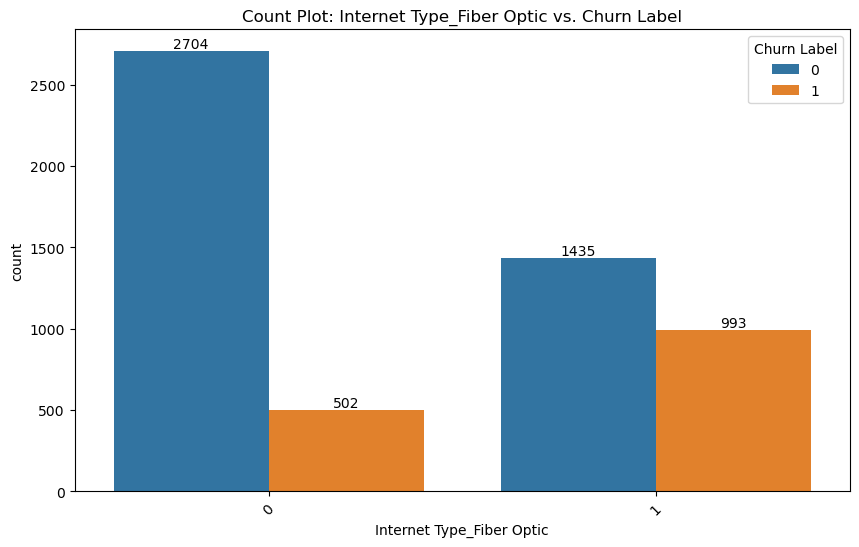

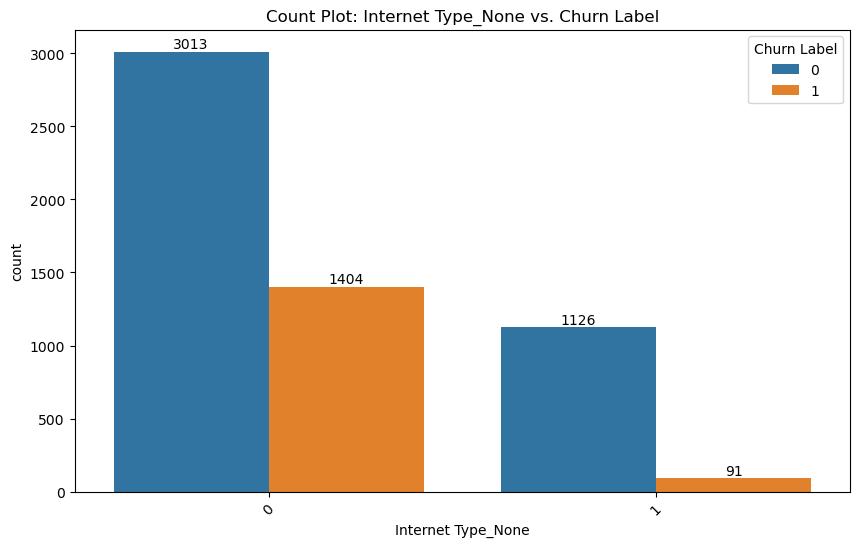

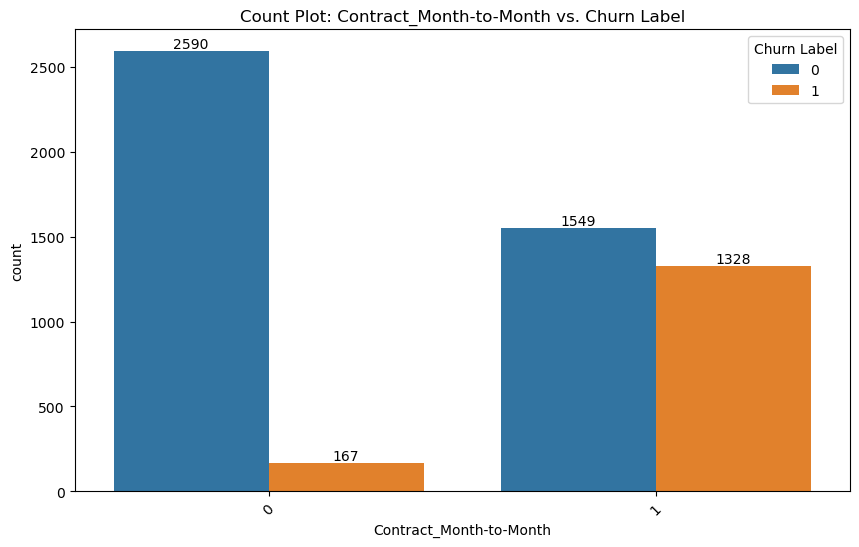

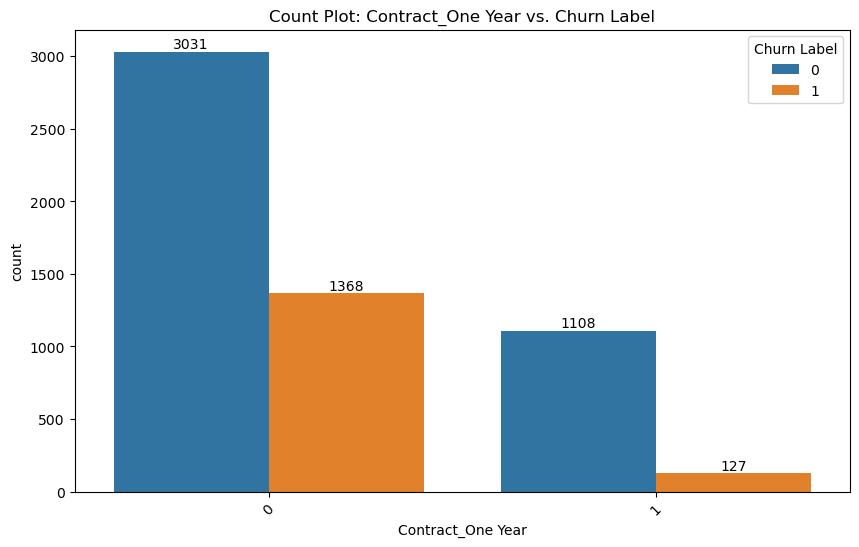

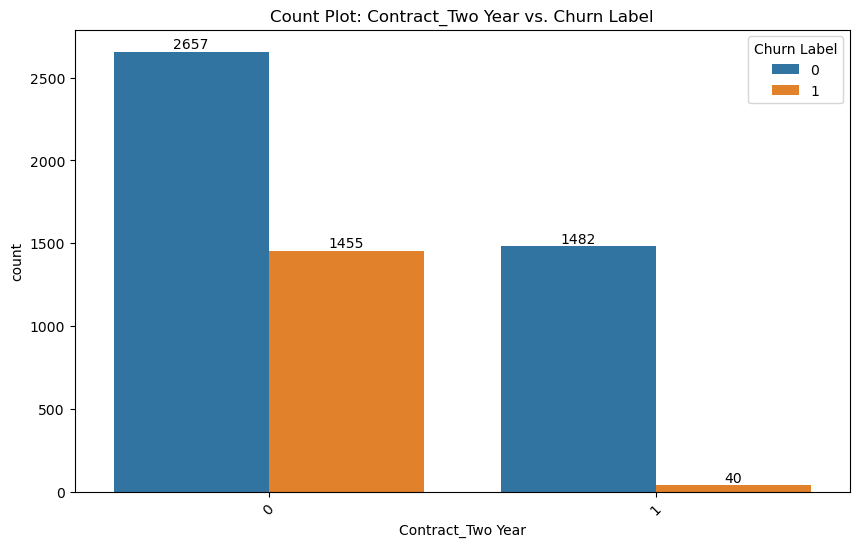

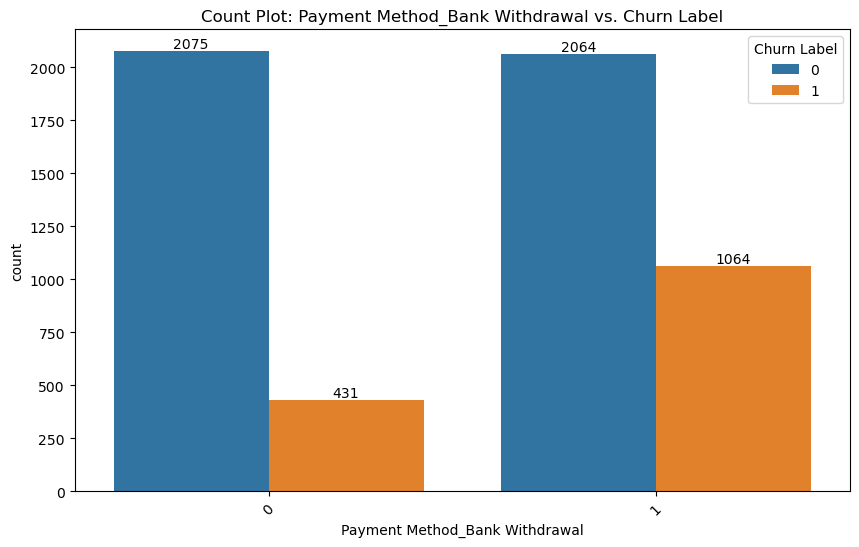

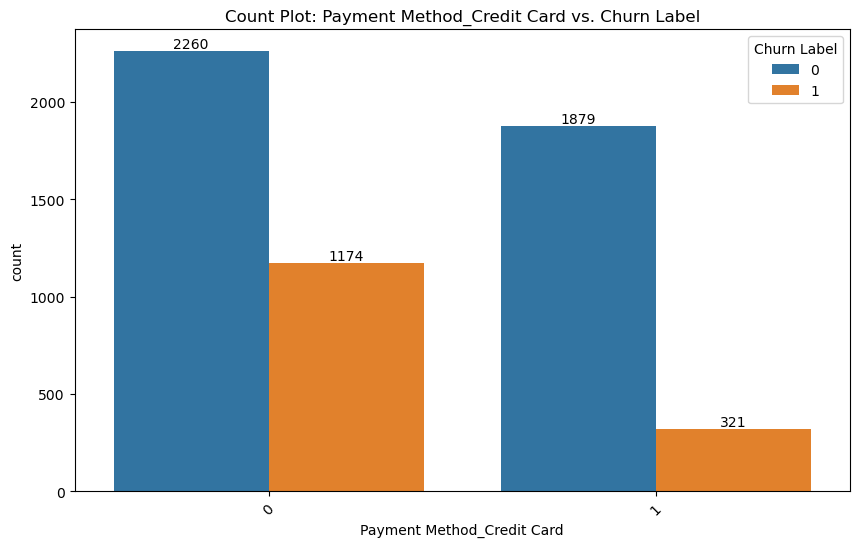

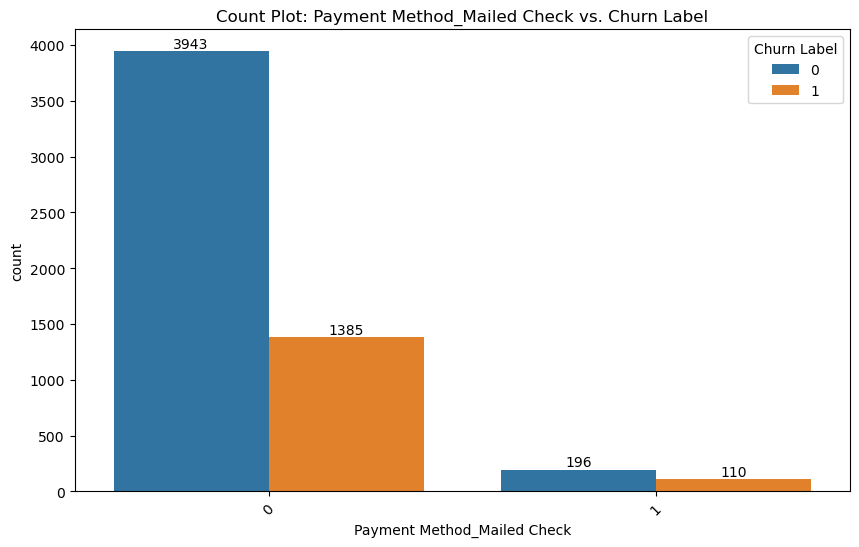

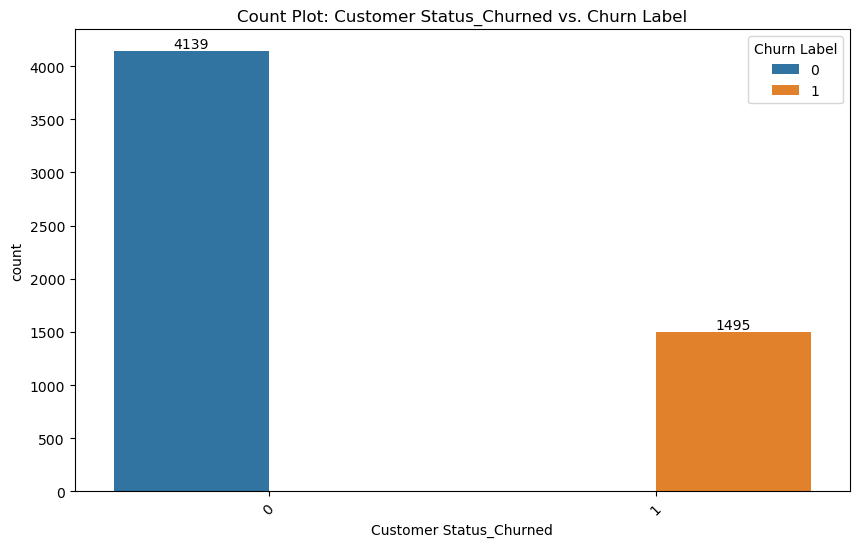

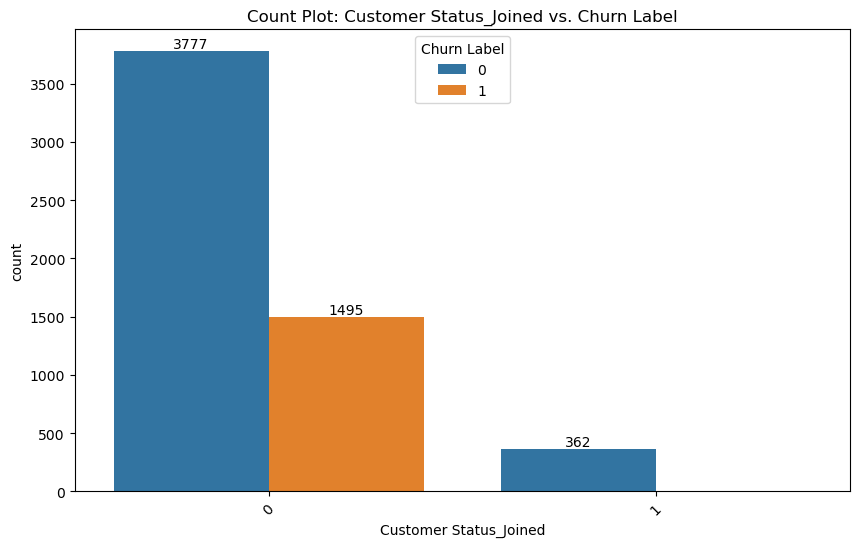

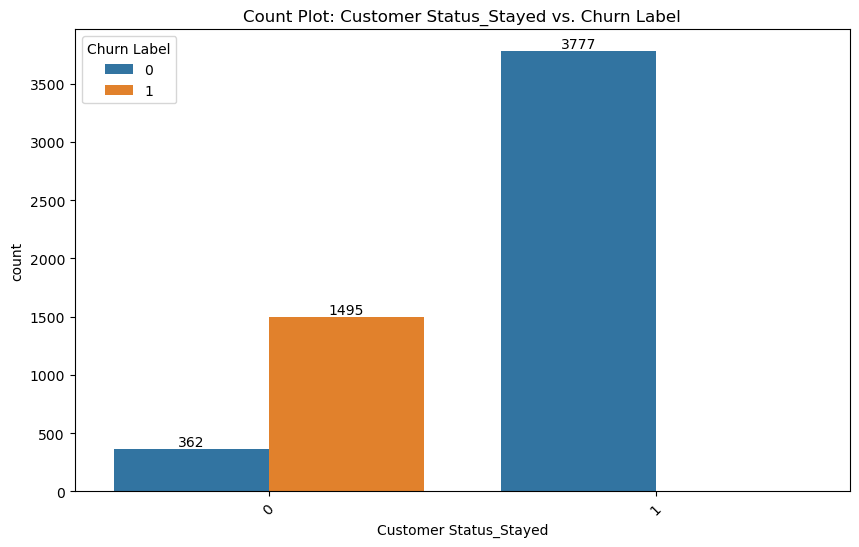

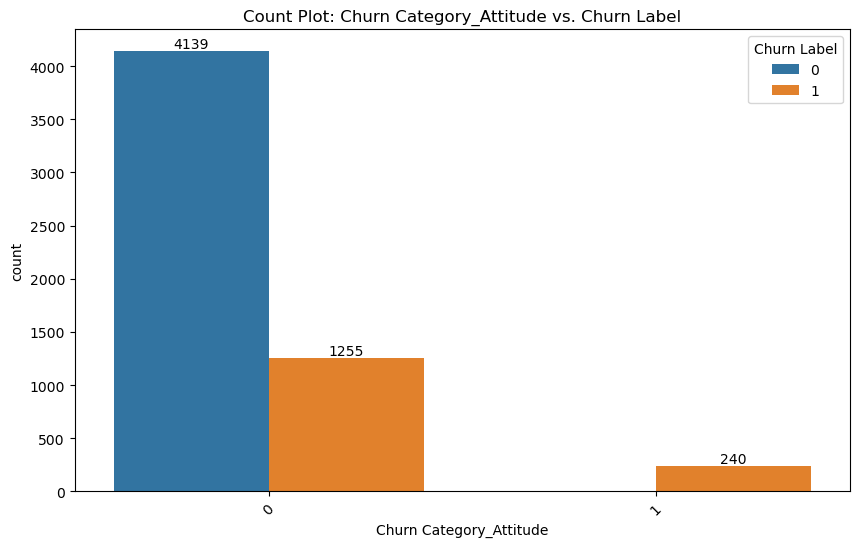

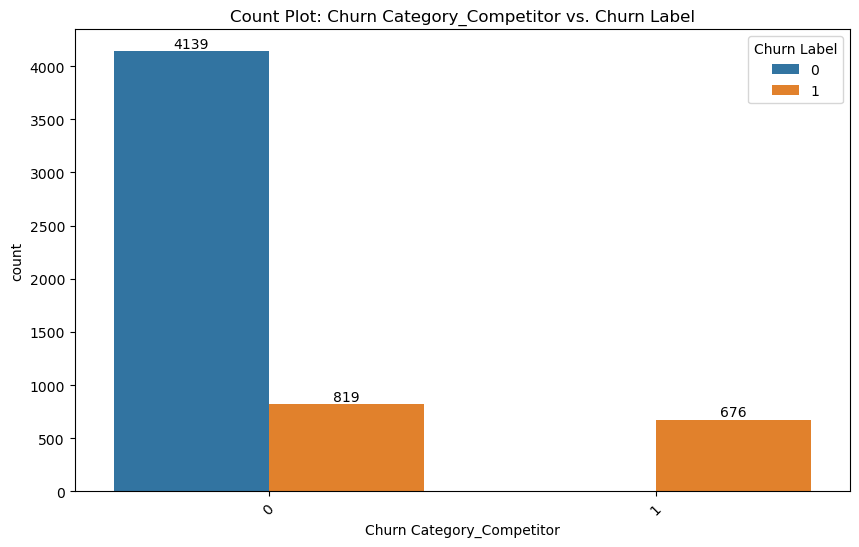

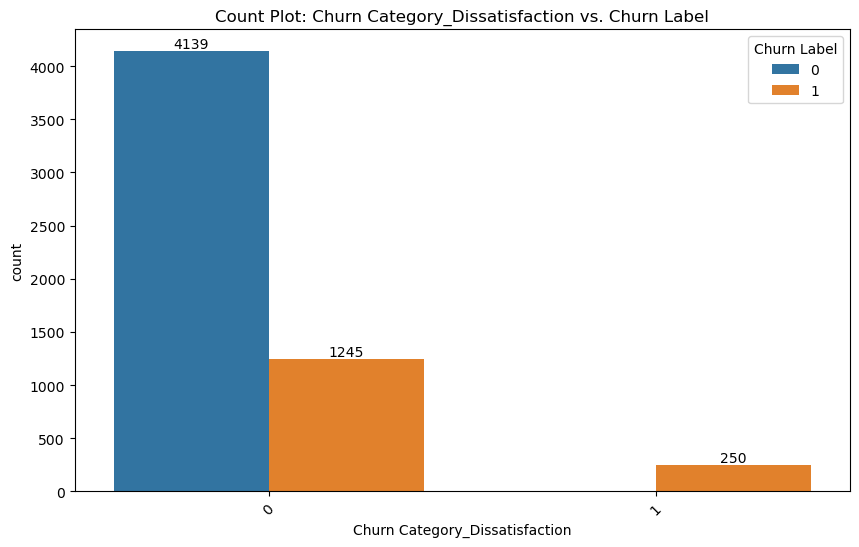

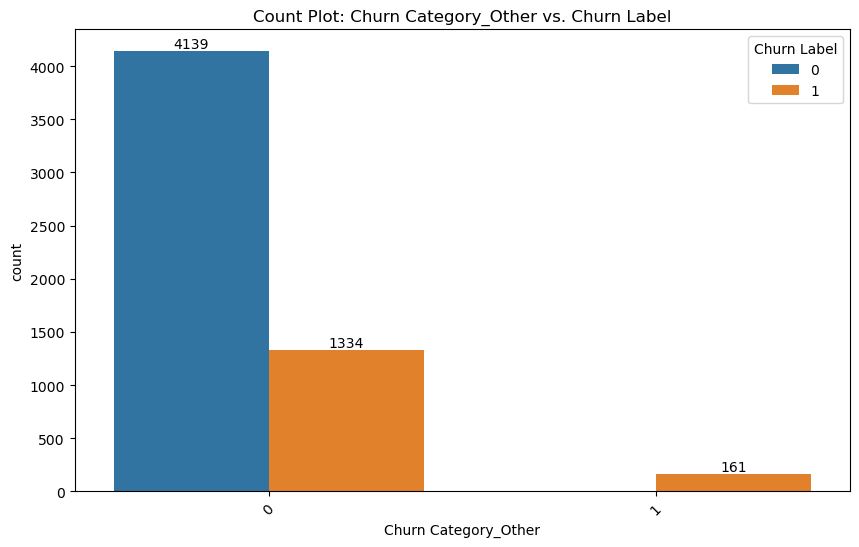

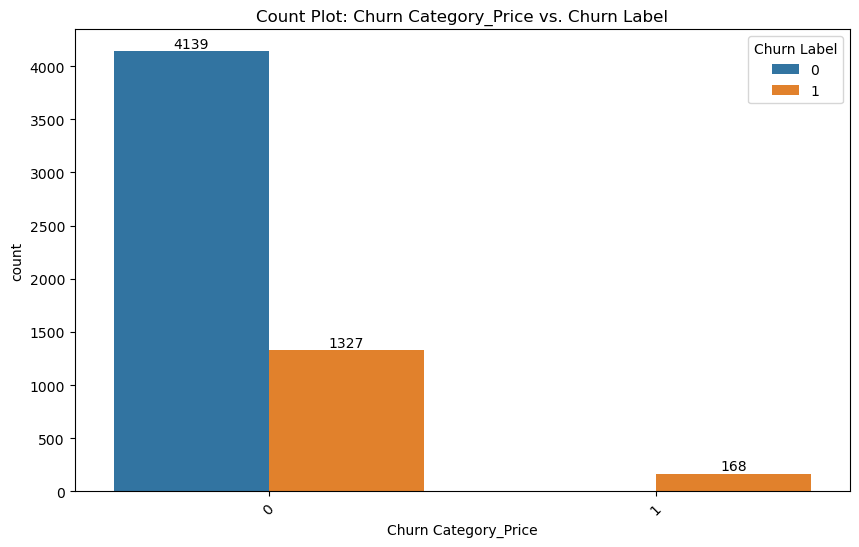

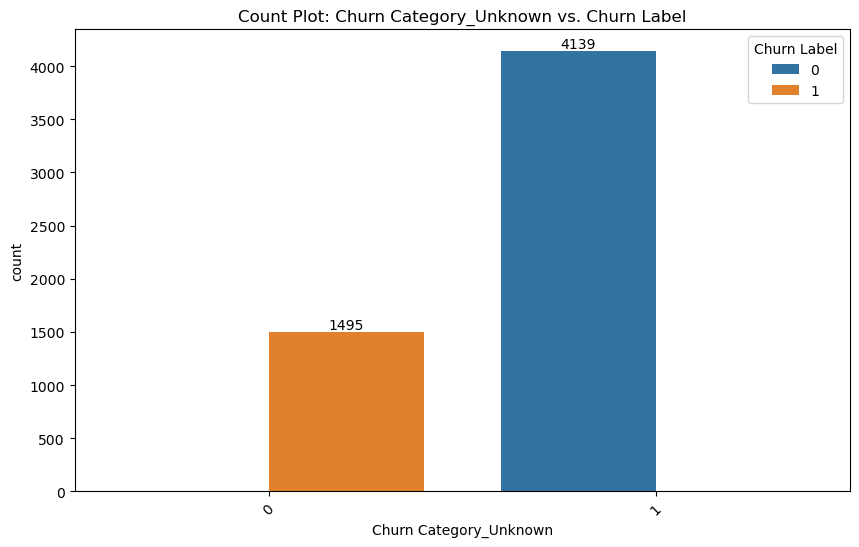

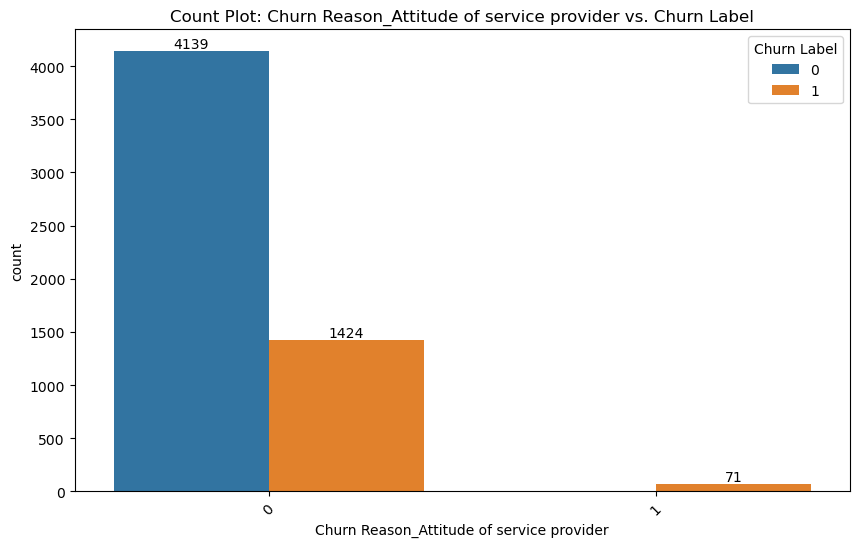

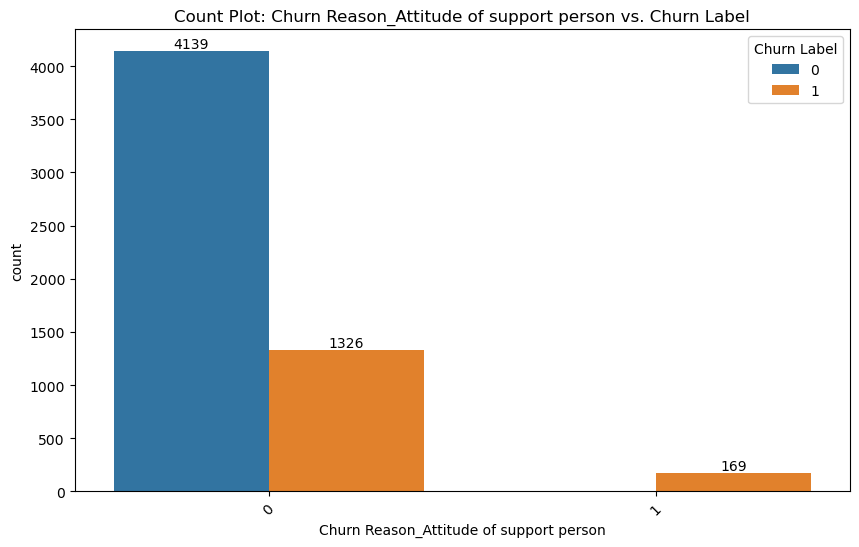

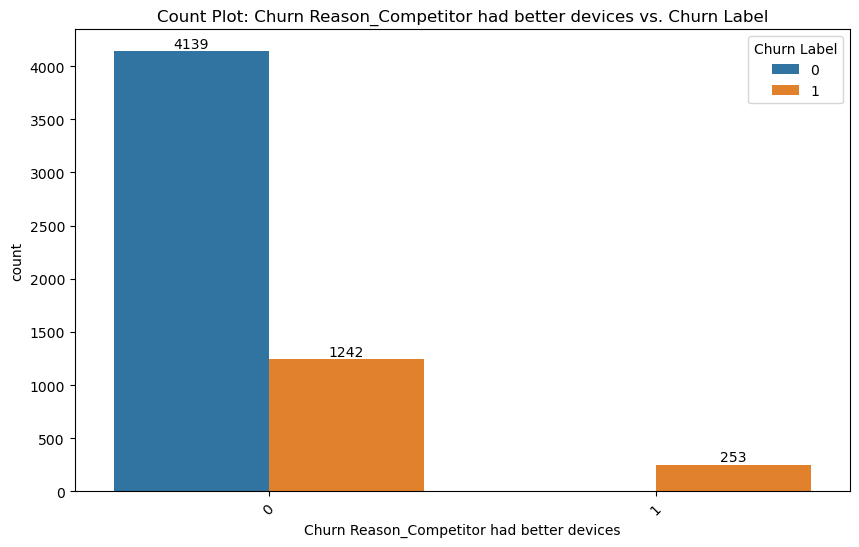

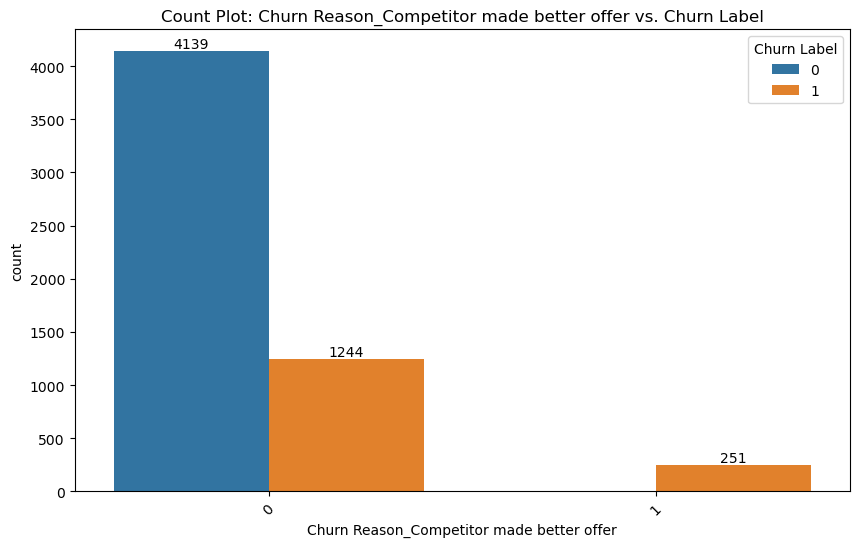

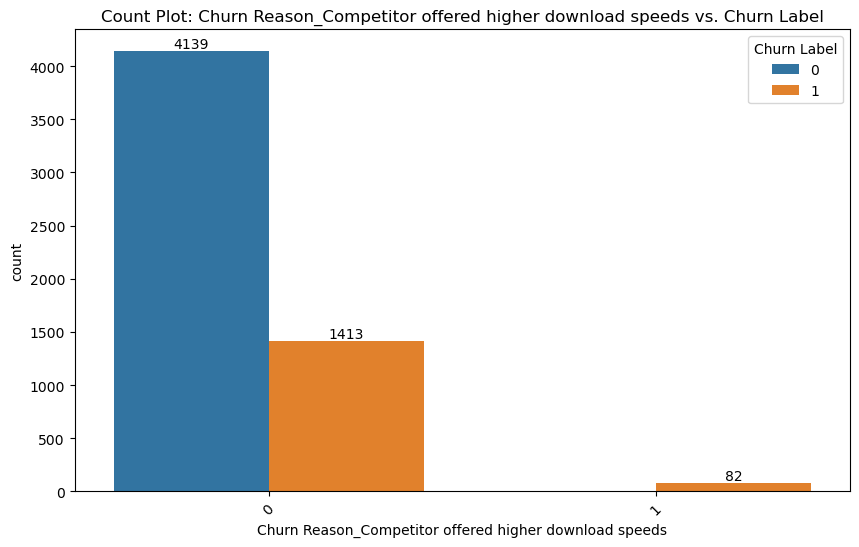

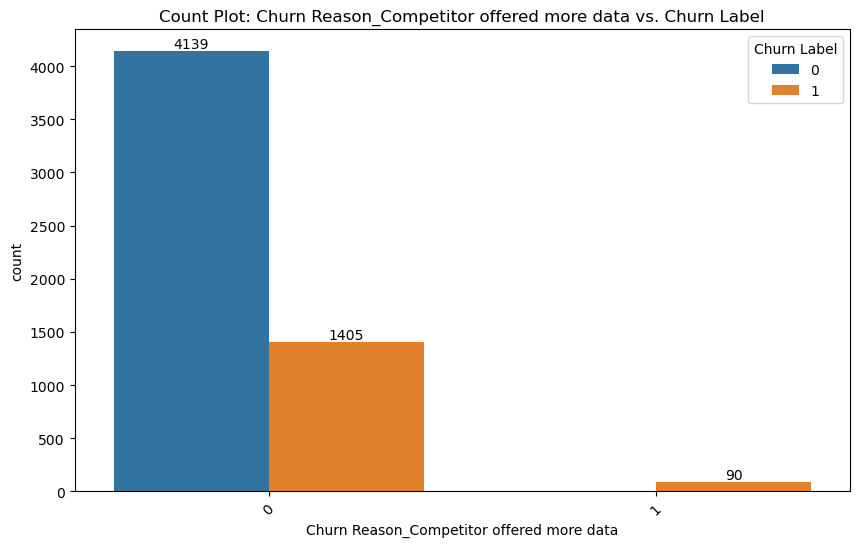

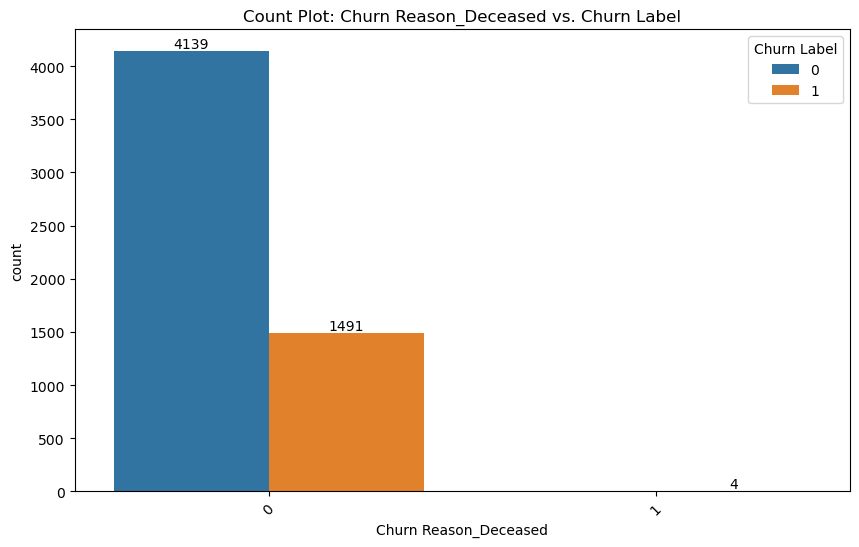

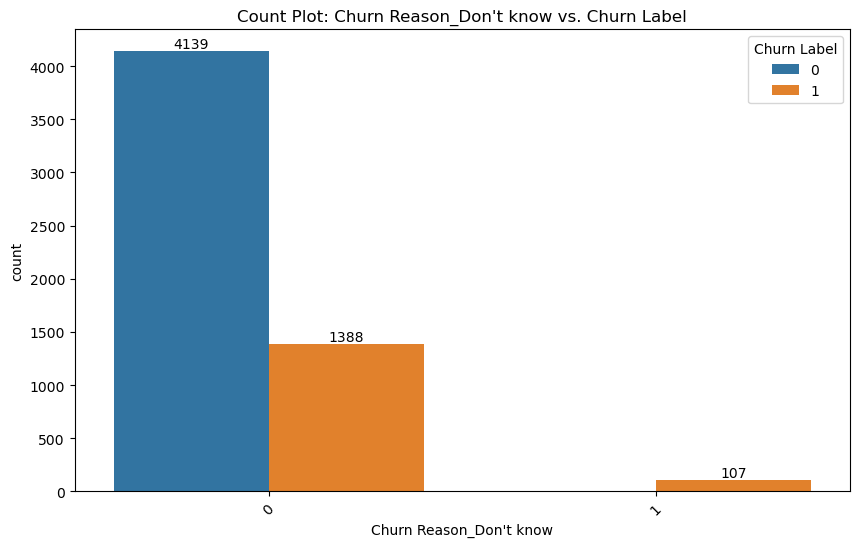

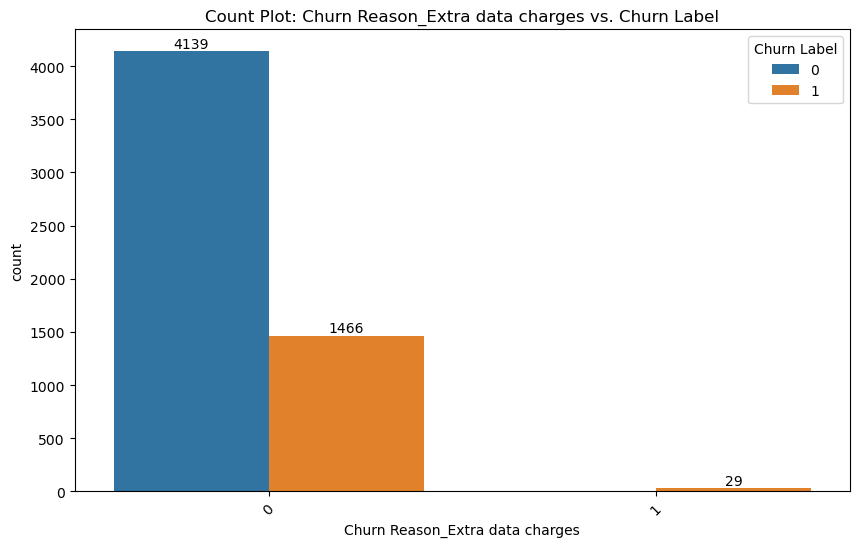

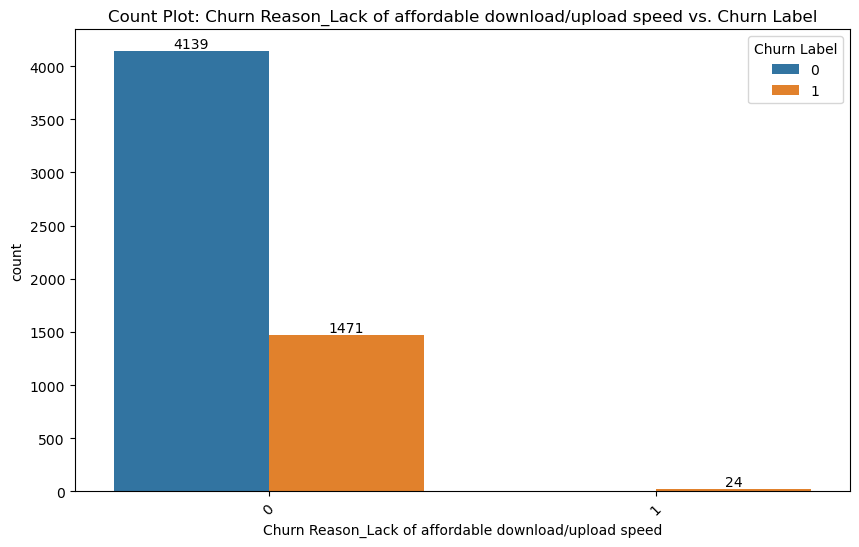

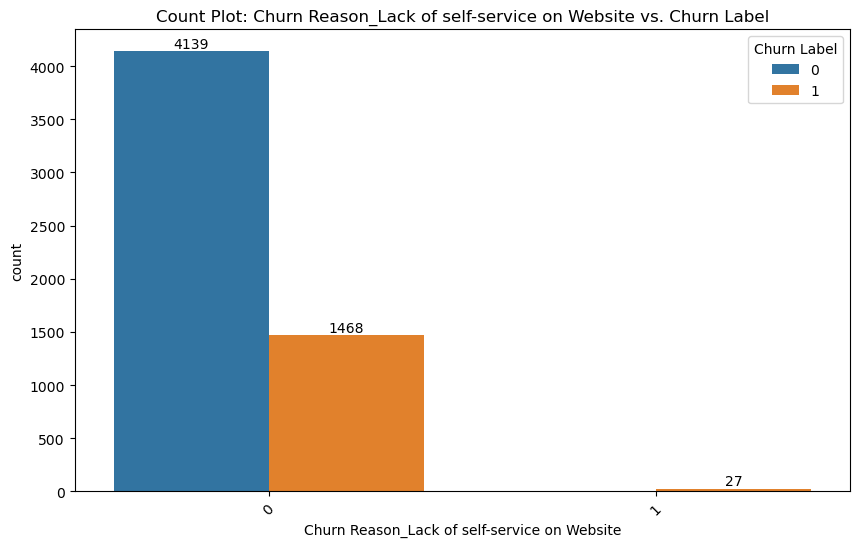

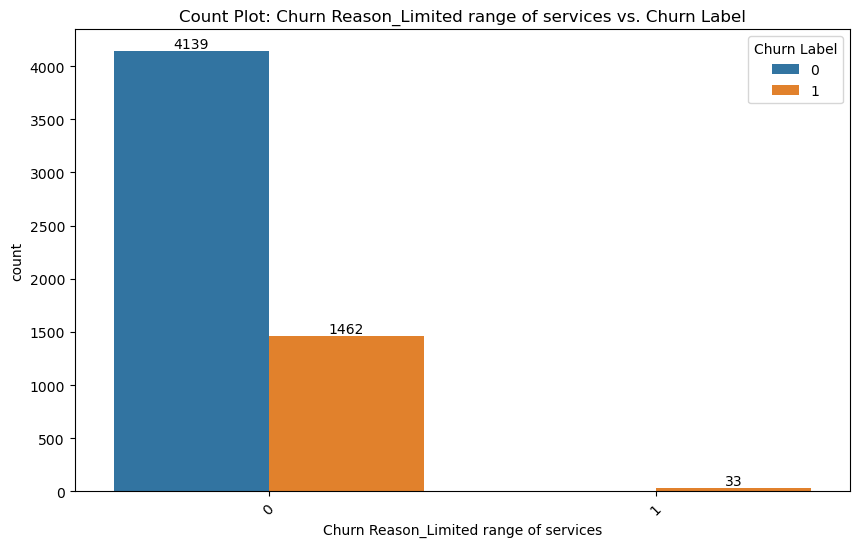

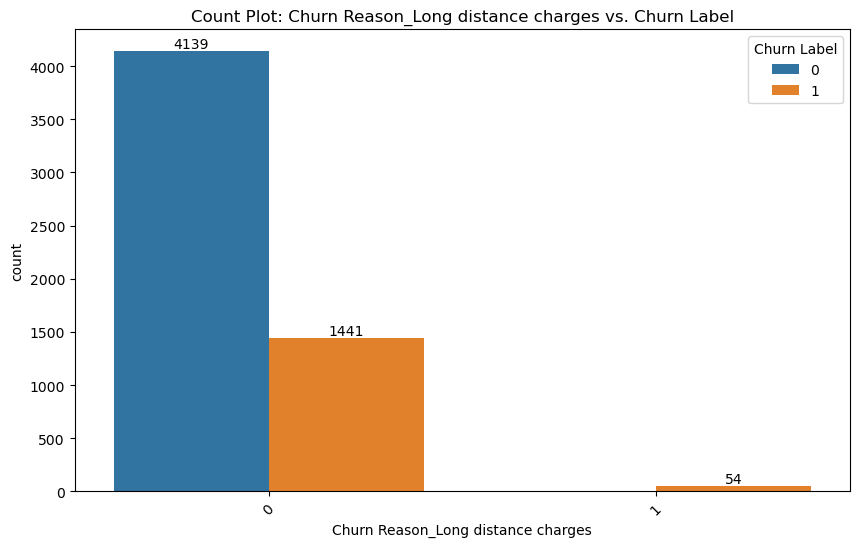

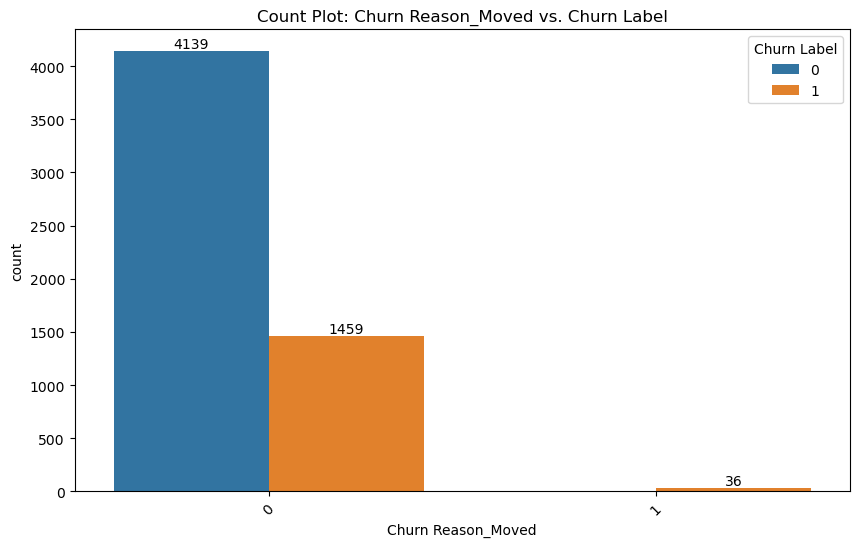

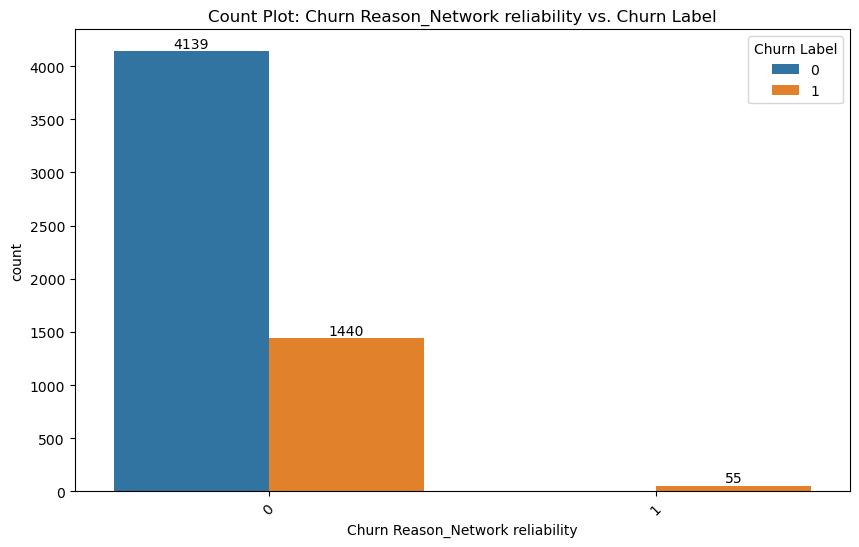

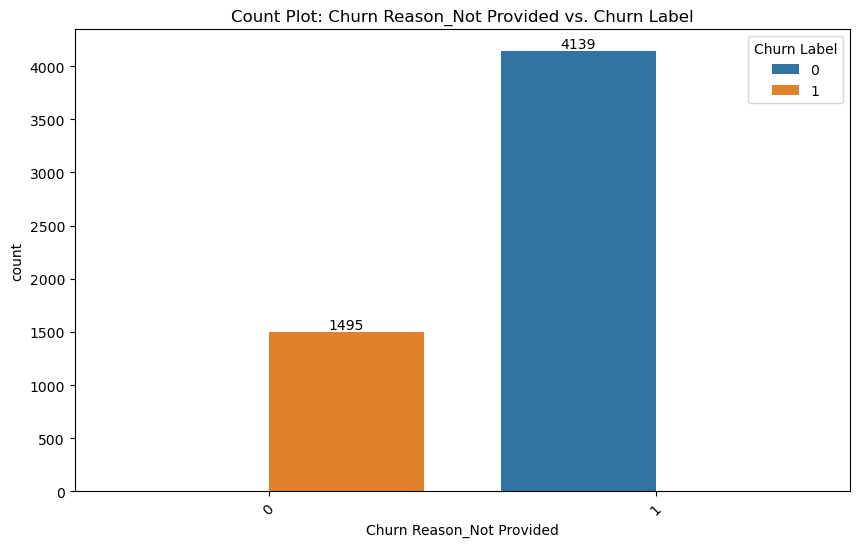

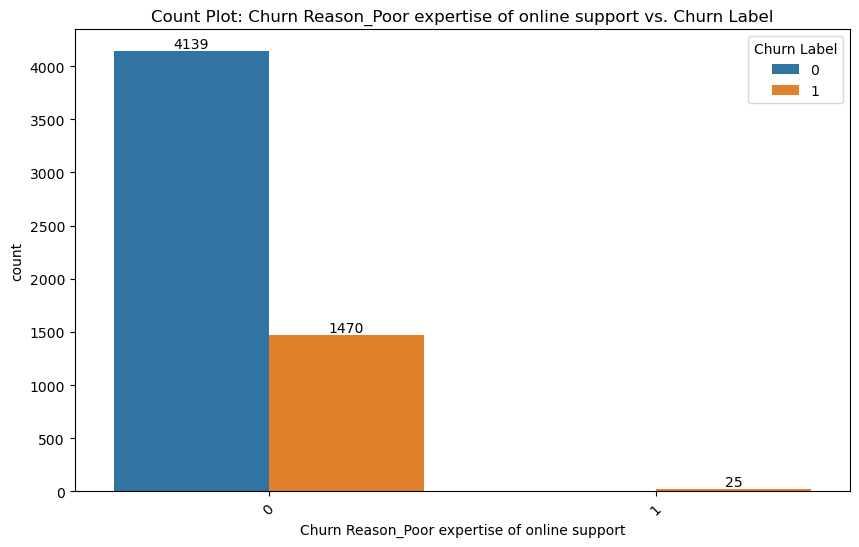

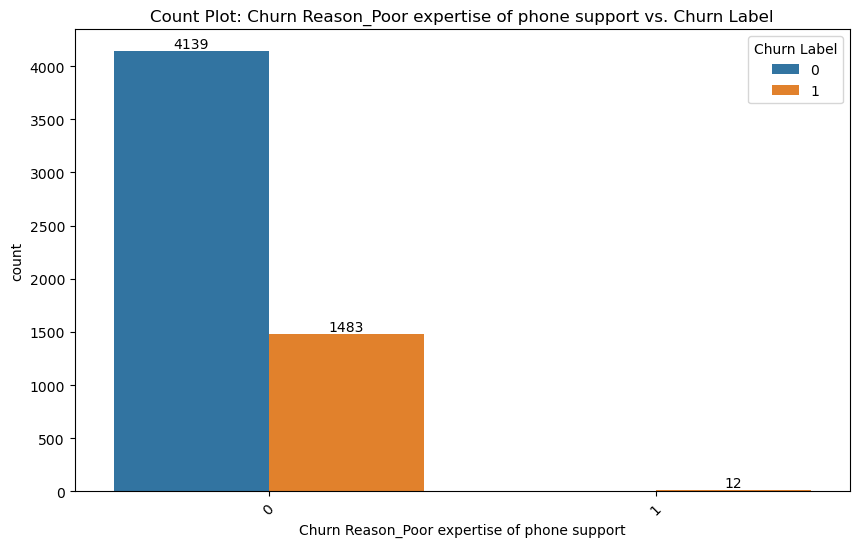

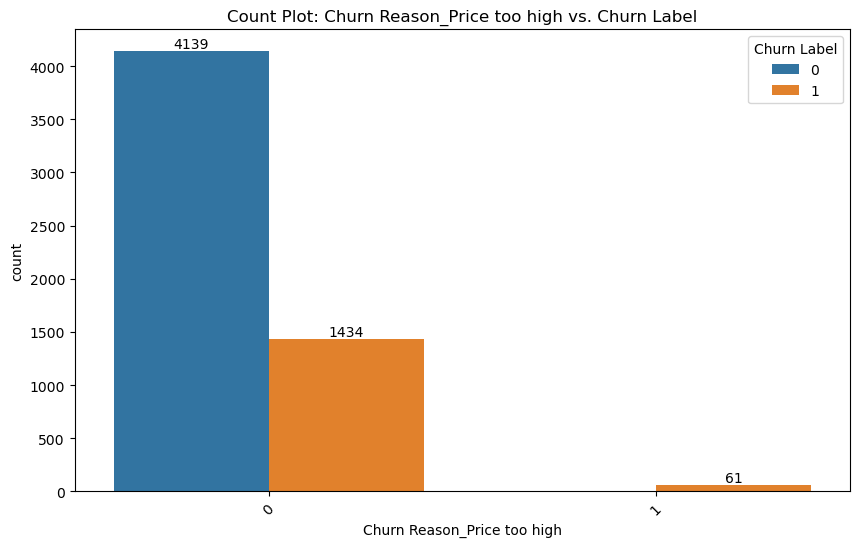

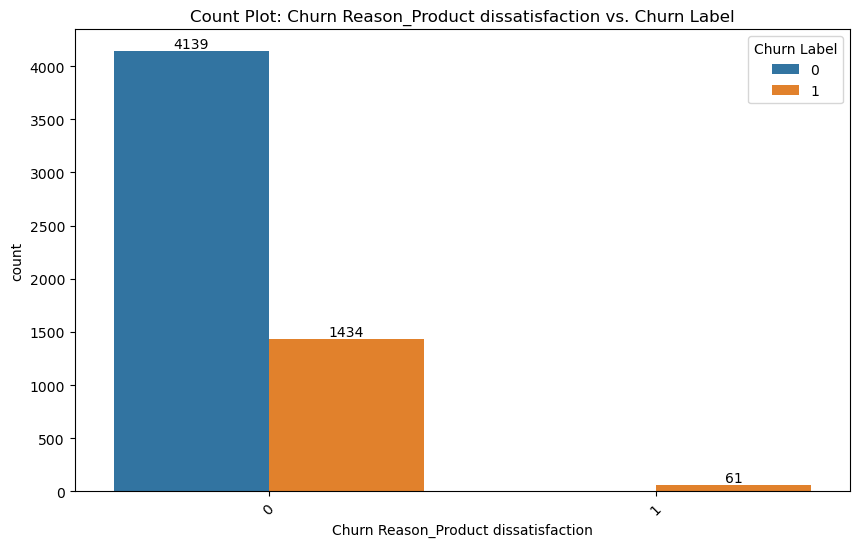

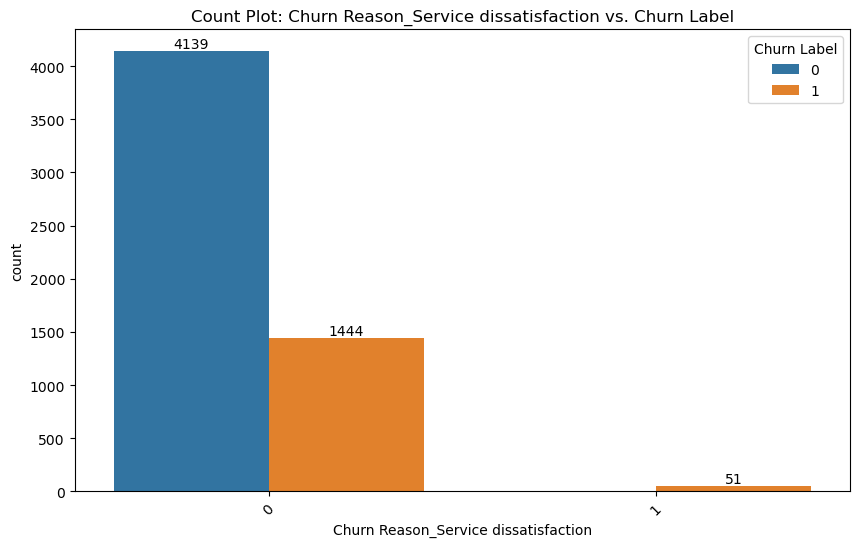

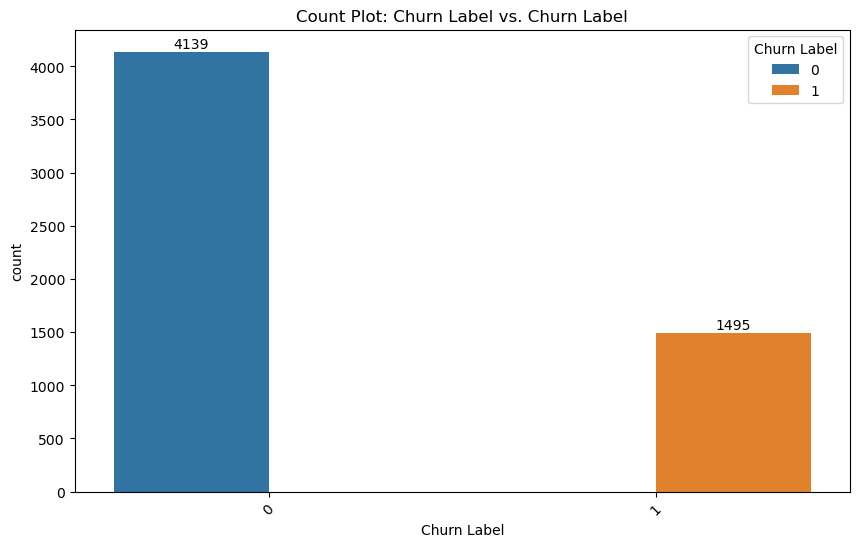

In [22]:
from matplotlib.ticker import FuncFormatter
# DataFrame `train_data` that includes both X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Initialize lists to store column names
one_hot_encoded_cols = []
label_encoded_cols = []

# Loop through all columns in the DataFrame
for col in train_data.columns:
    if train_data[col].dtype == 'int64' or train_data[col].dtype == 'float64':
        unique_values = train_data[col].nunique()
        
        # Identify one-hot encoded columns (binary columns with only two unique values)
        if unique_values == 2 and set(train_data[col].unique()) <= {0, 1}:
            one_hot_encoded_cols.append(col)
        # Identify label encoded columns (categorical columns with a limited number of unique integer values)
        elif unique_values < 20:  # Adjust threshold based on your understanding of the data
            label_encoded_cols.append(col)

# Now plot the bivariate analysis using identified columns

# Function to format the x-axis labels
def custom_format(x, pos):
    if x == 0 or x == 1:
        return f'{int(x)}'  # Remove decimal for 0 and 1
    else:
        return f'{x:.2f}'  # Format other numbers to 2 decimal places

    
# Plot for Label Encoded Columns
for col in label_encoded_cols:
    if col != 'Churn Label':  # Skip target column
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=train_data, x=col, hue='Churn Label')
        ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')
        plt.title(f'Count Plot: {col} vs. Churn Label')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Plot for One-Hot Encoded Columns
for col in one_hot_encoded_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=train_data, x=col, hue='Churn Label')
    ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    plt.title(f'Count Plot: {col} vs. Churn Label')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


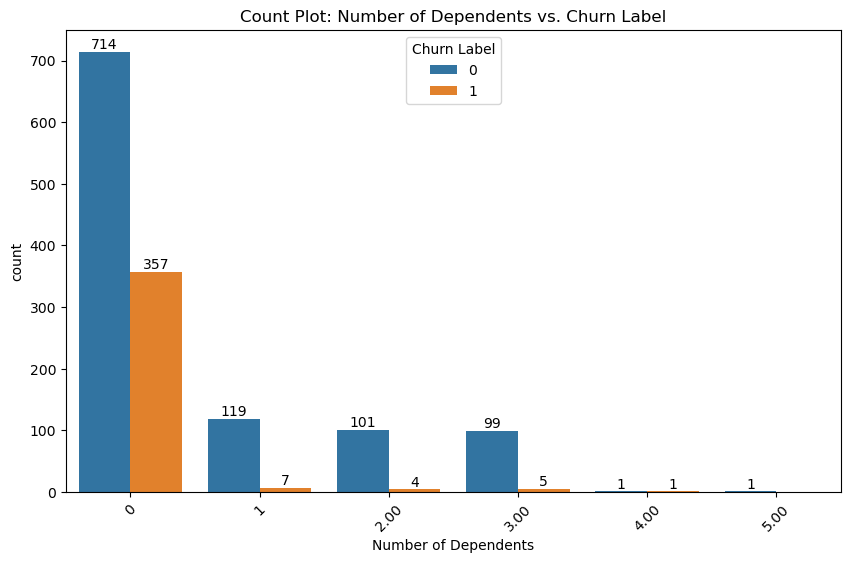

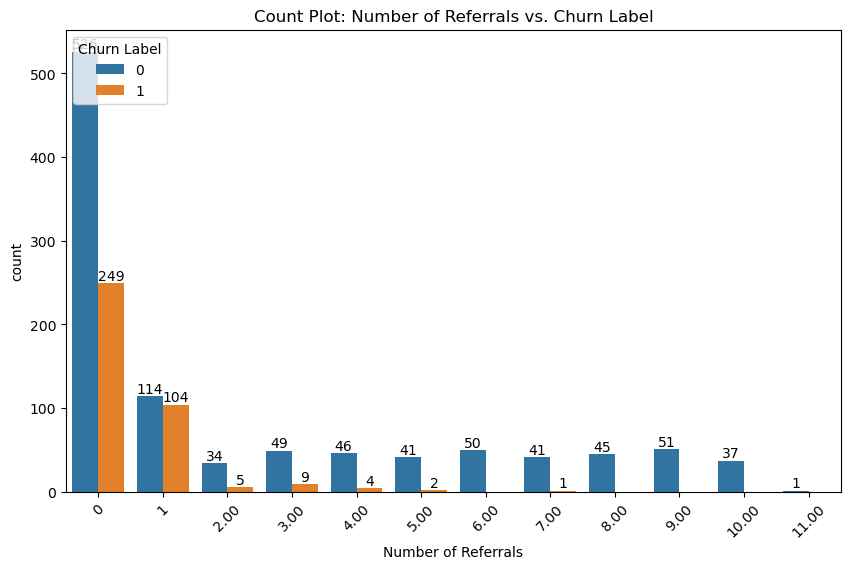

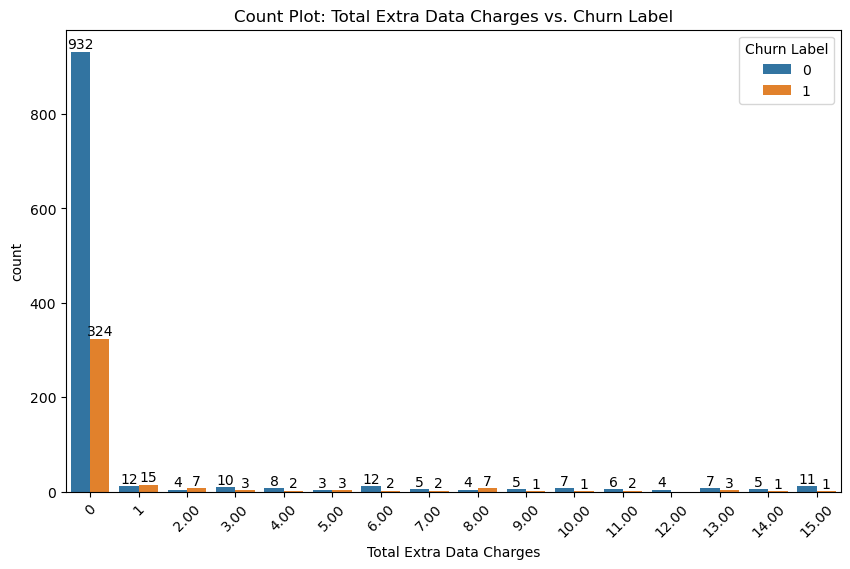

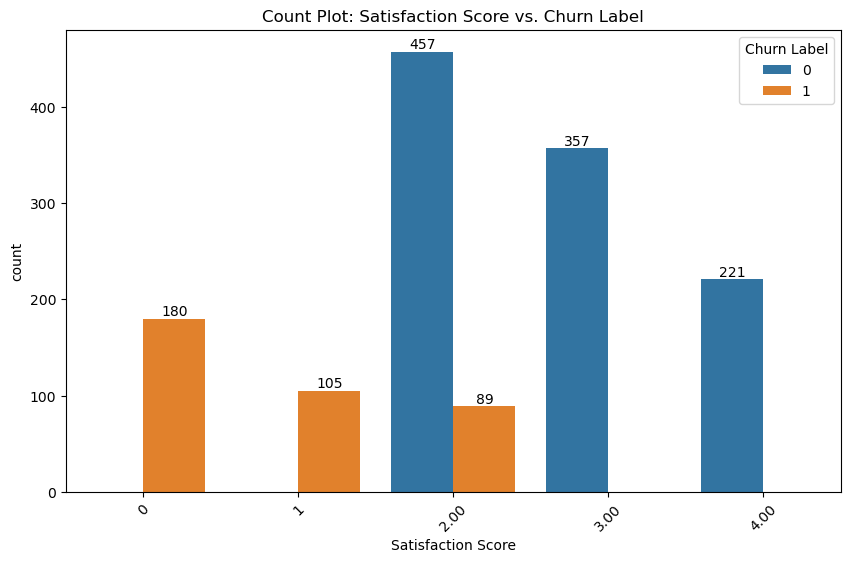

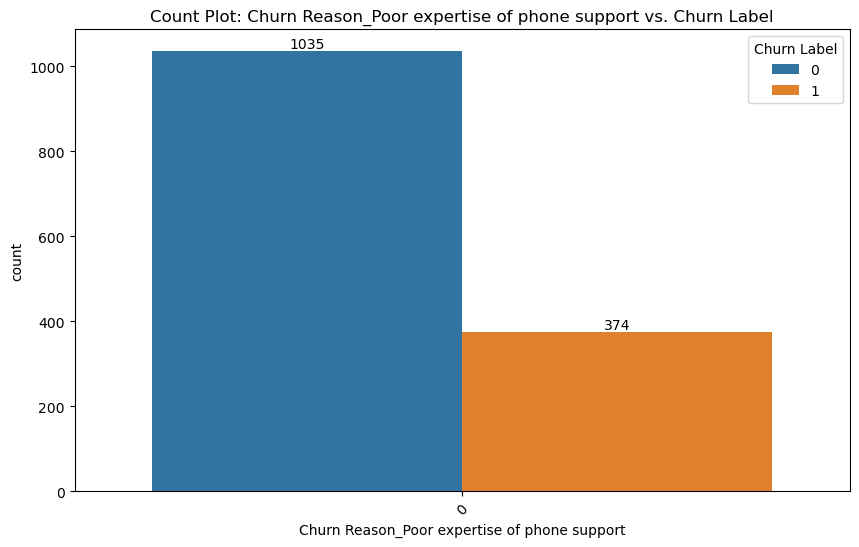

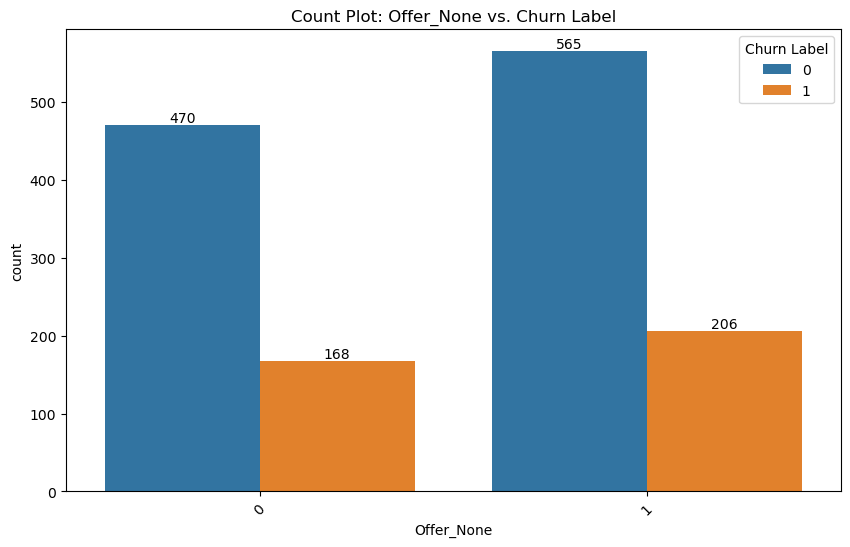

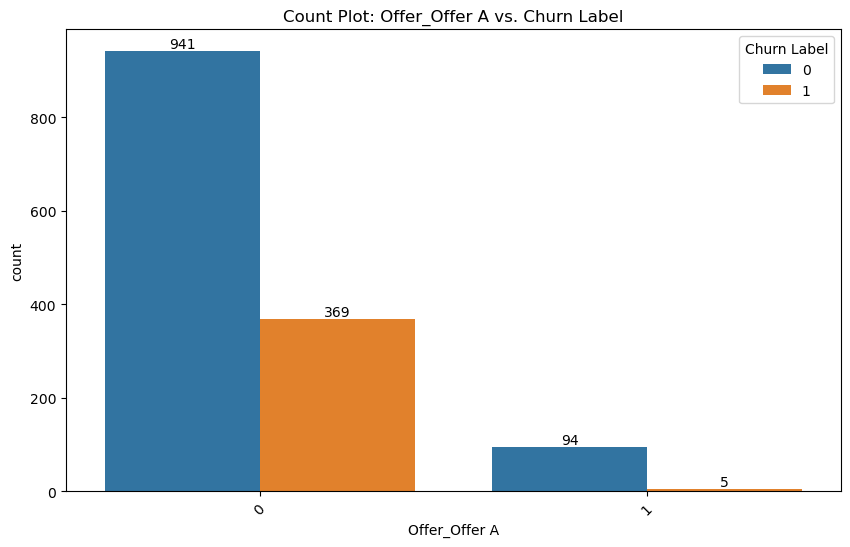

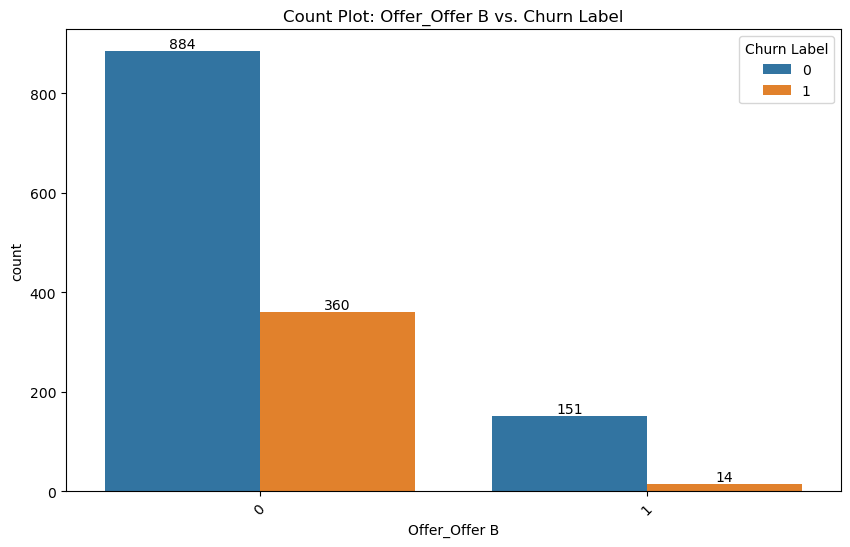

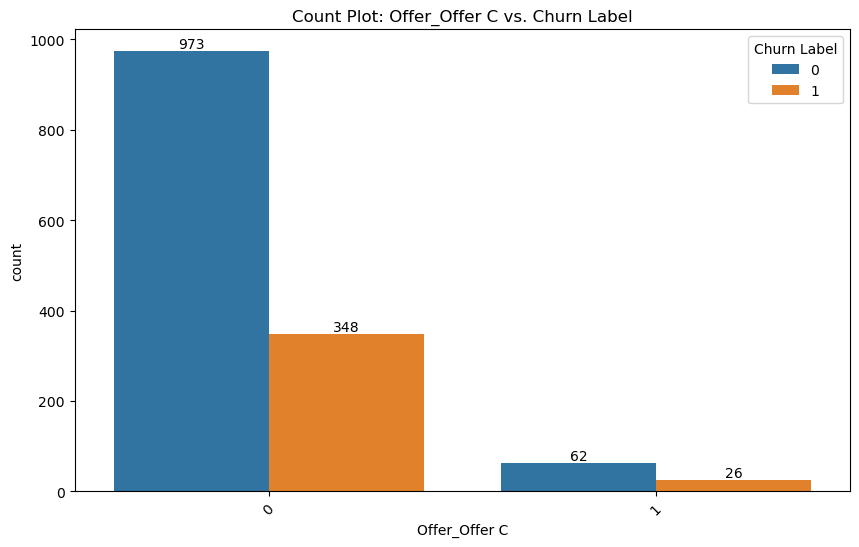

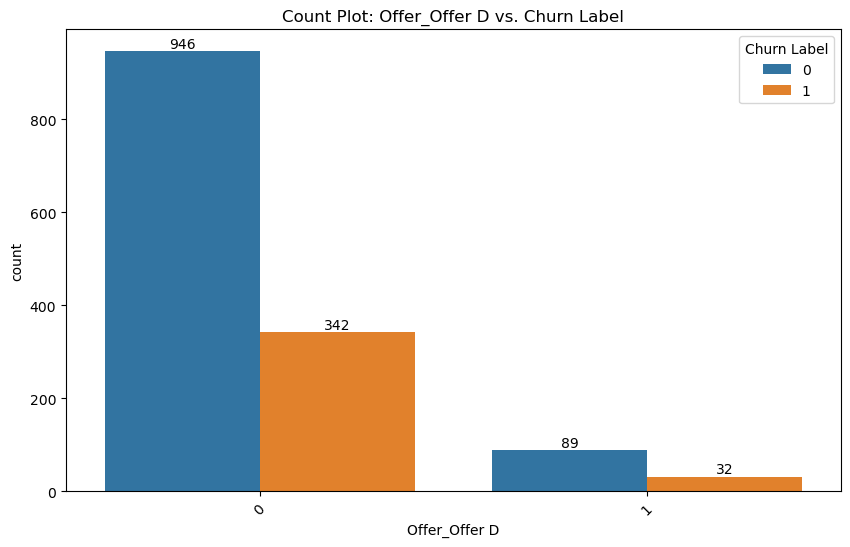

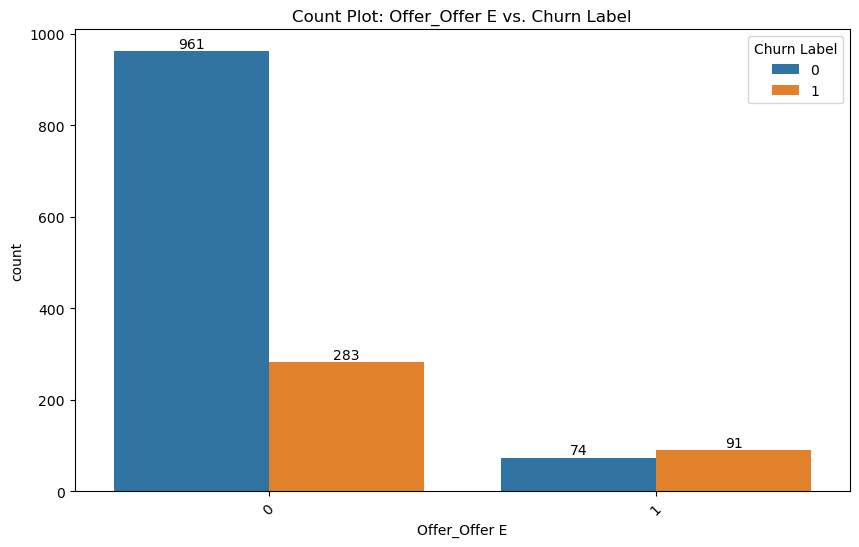

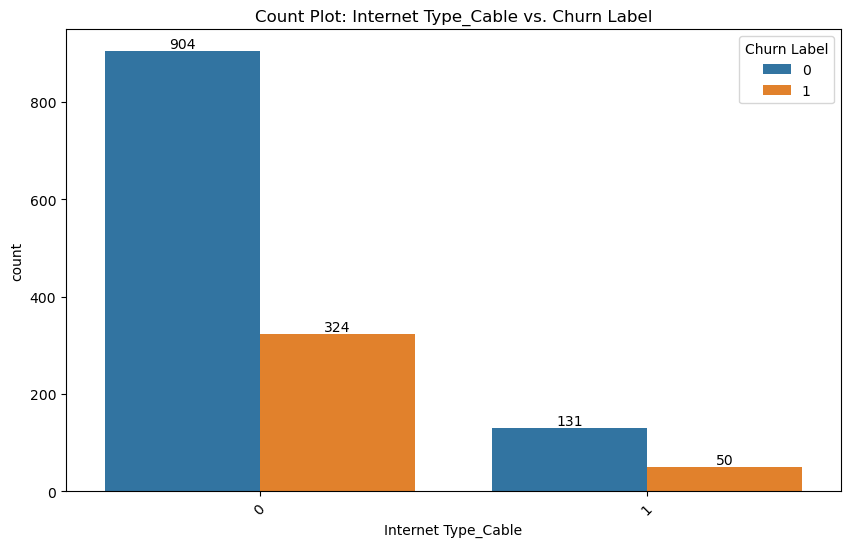

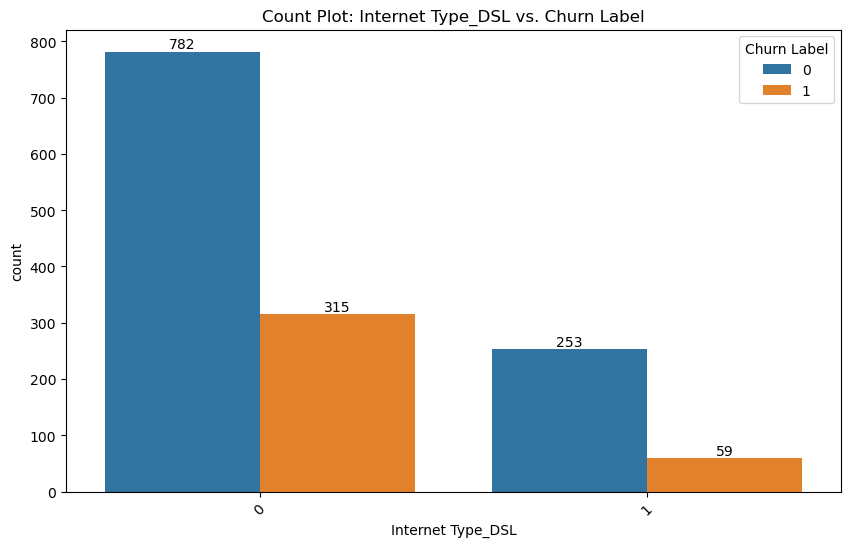

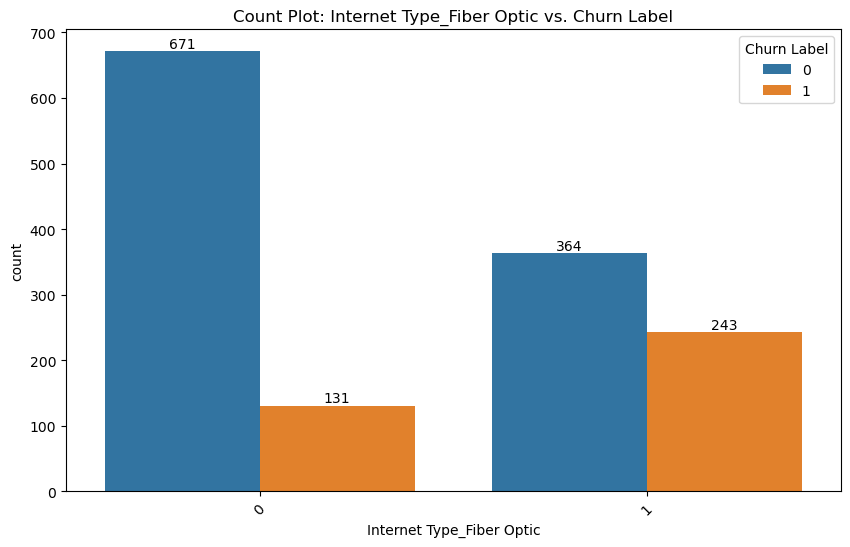

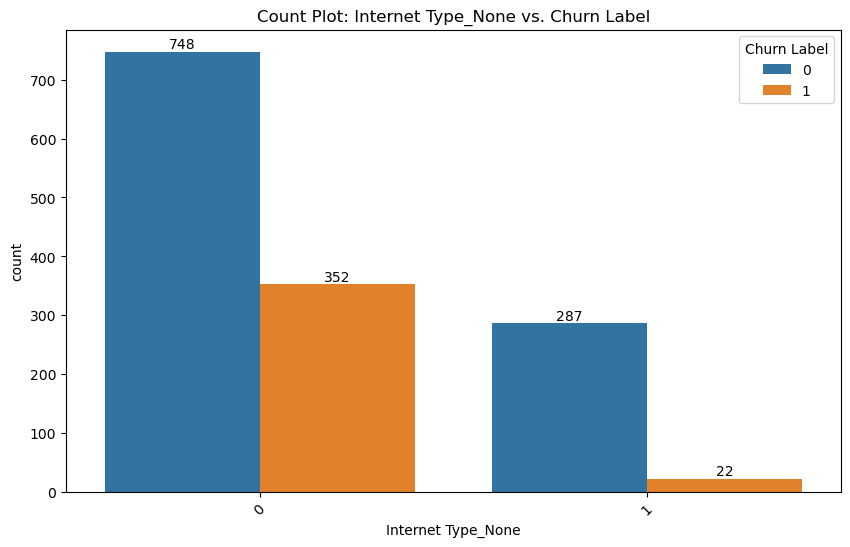

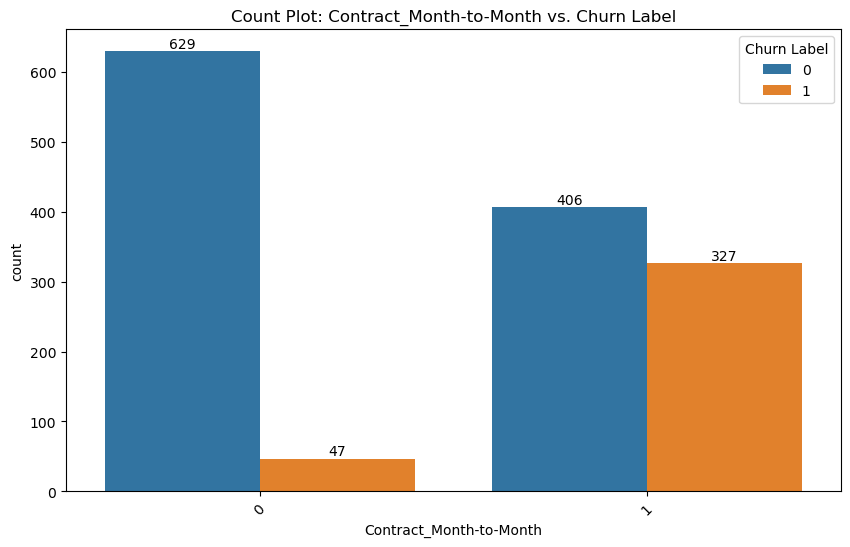

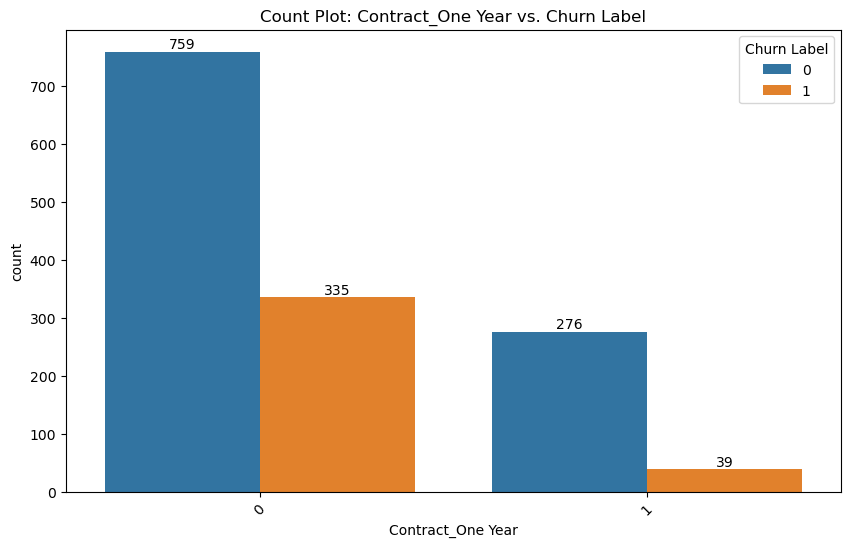

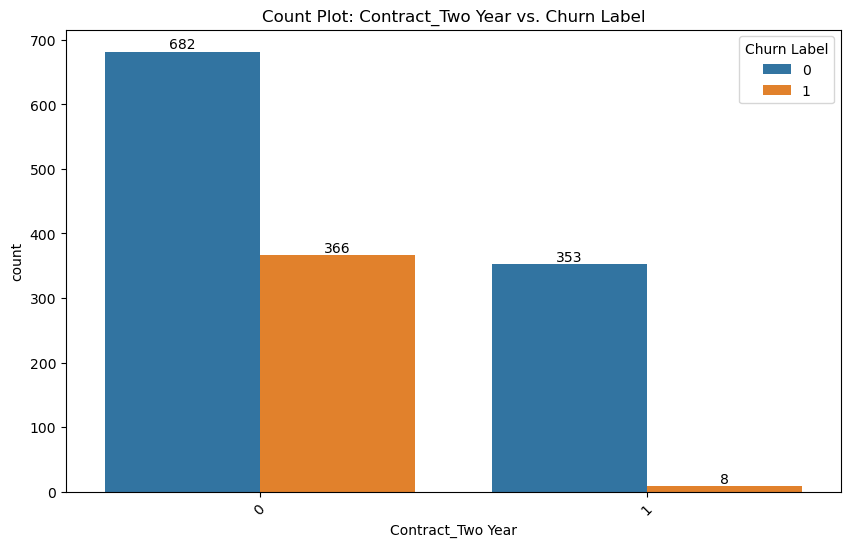

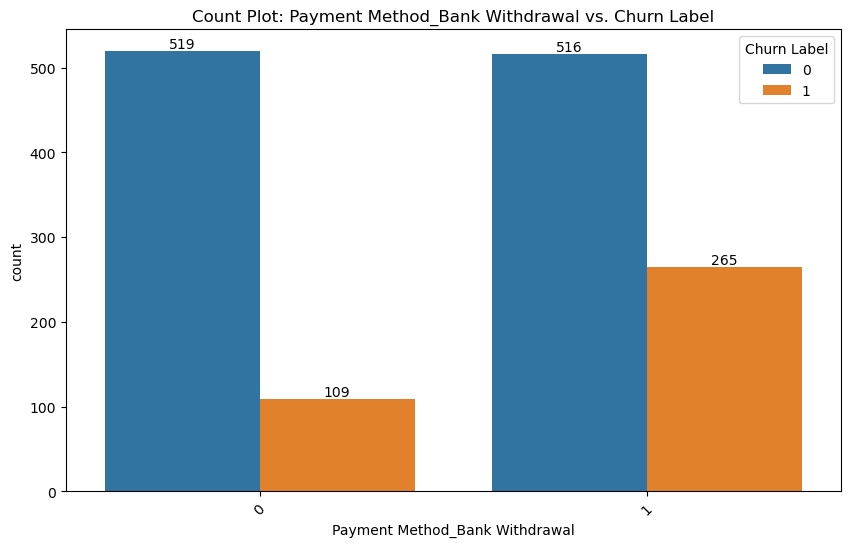

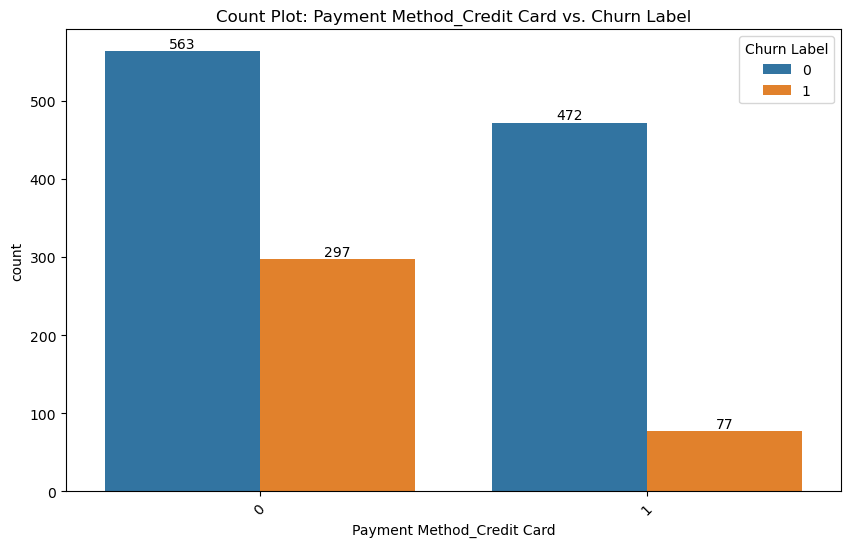

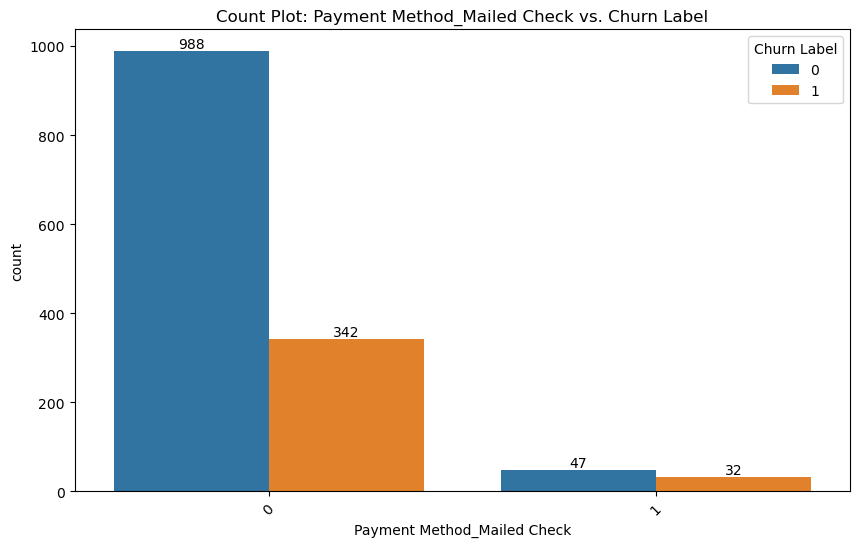

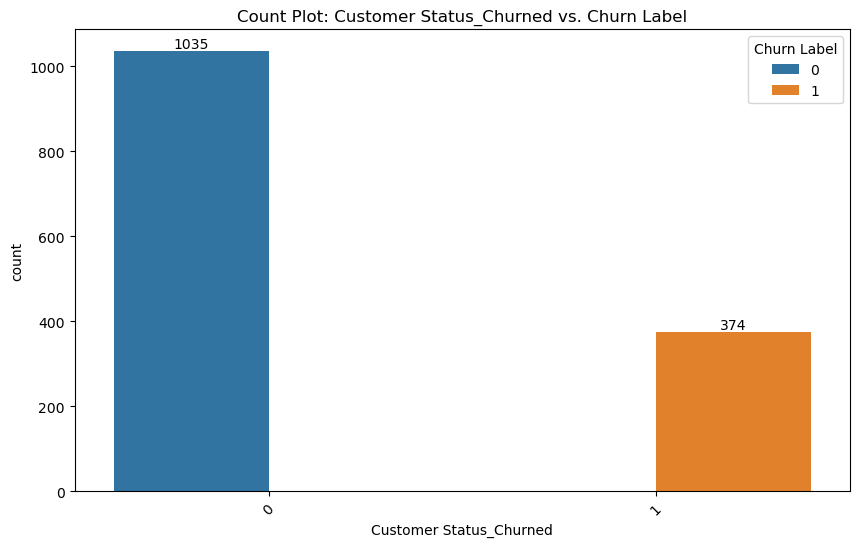

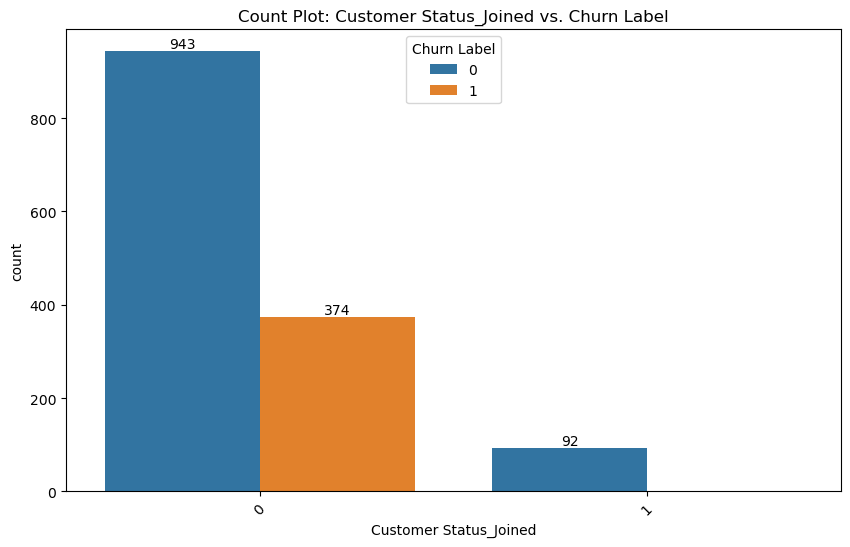

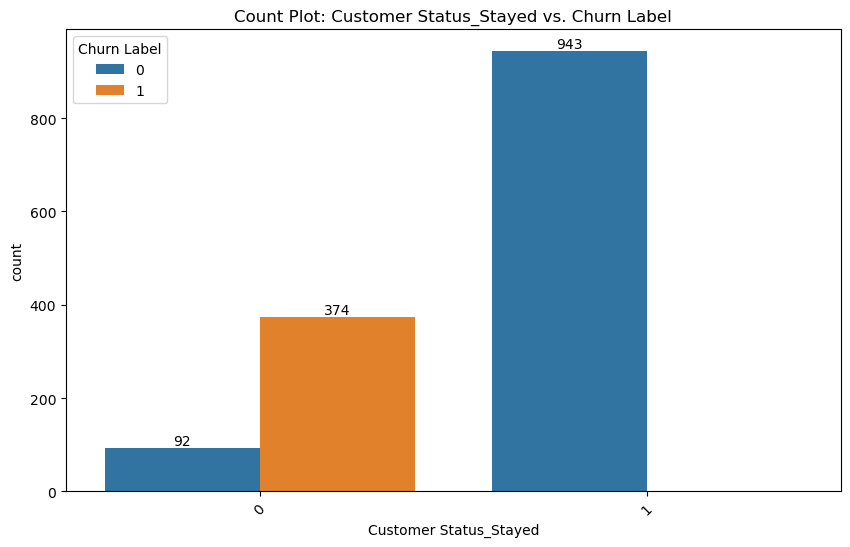

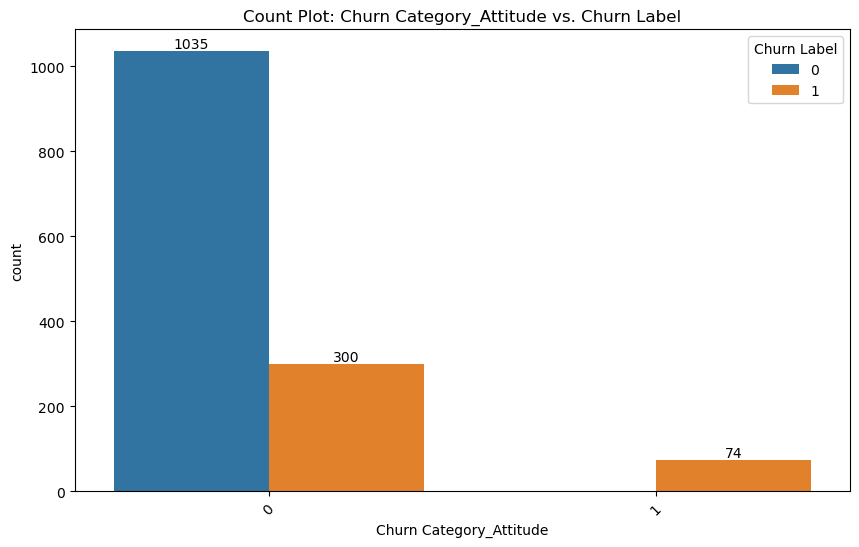

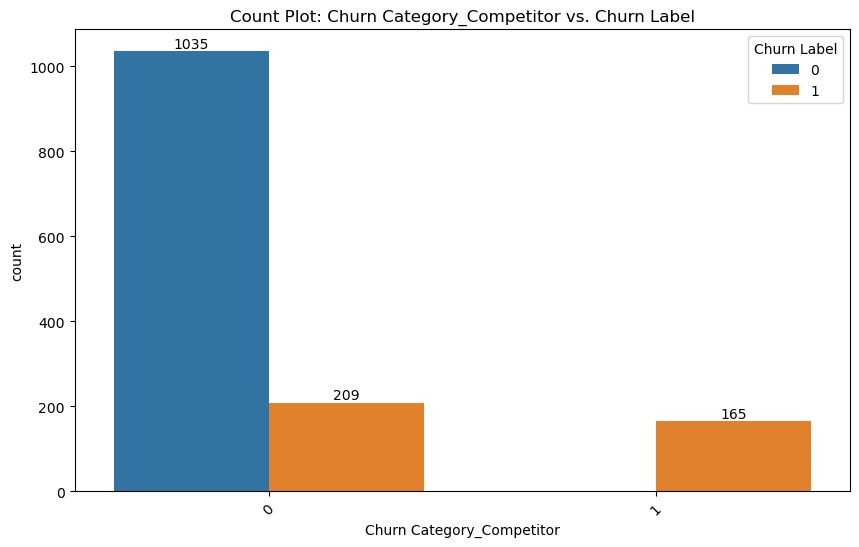

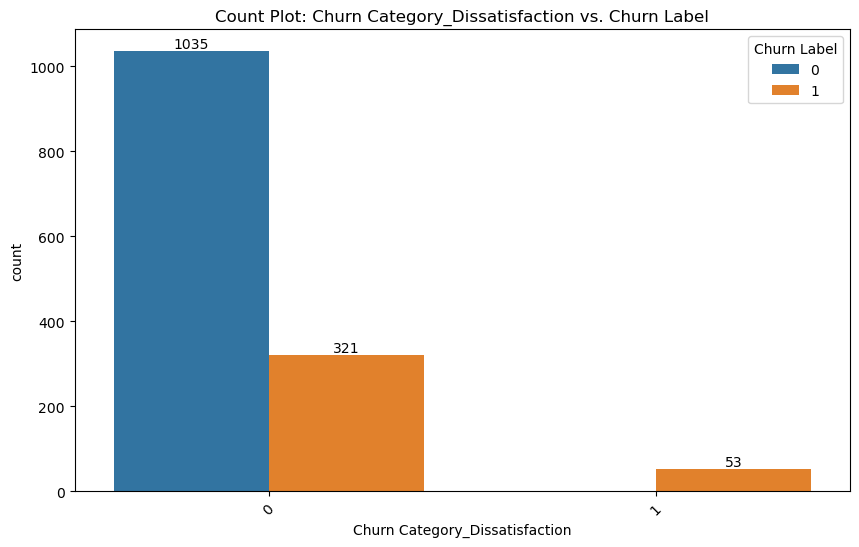

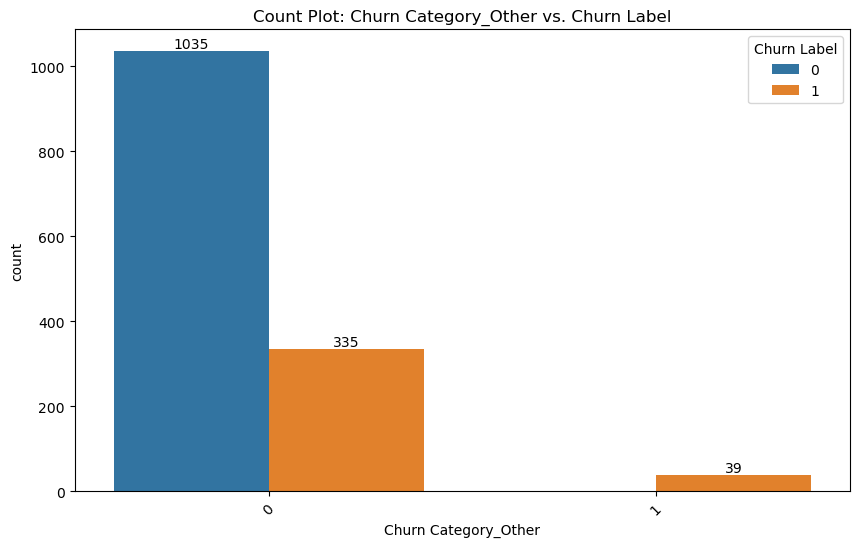

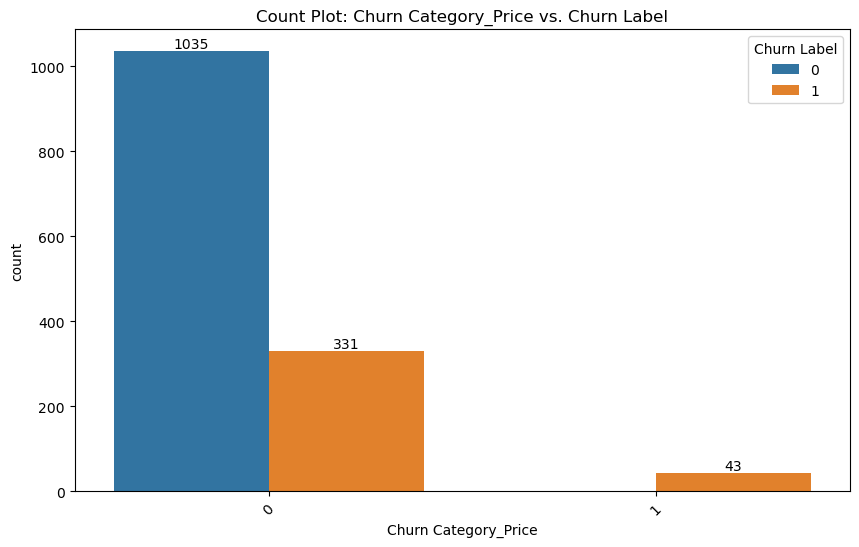

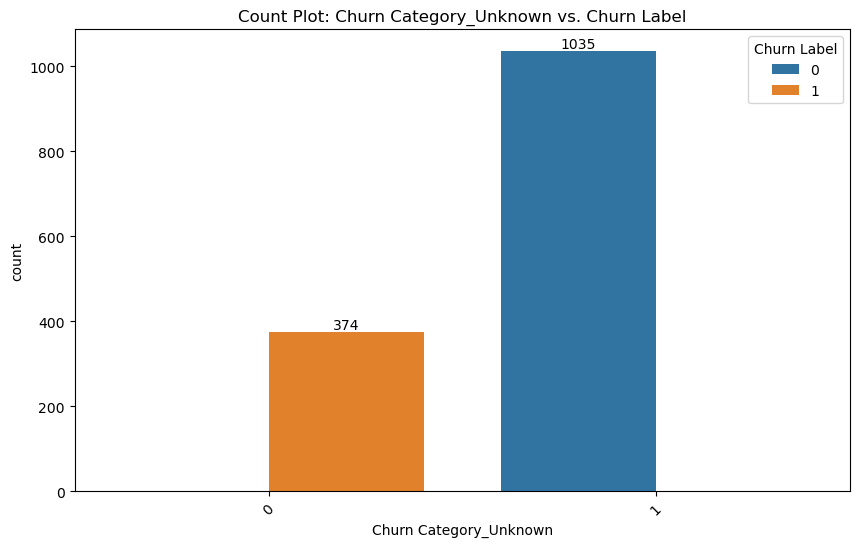

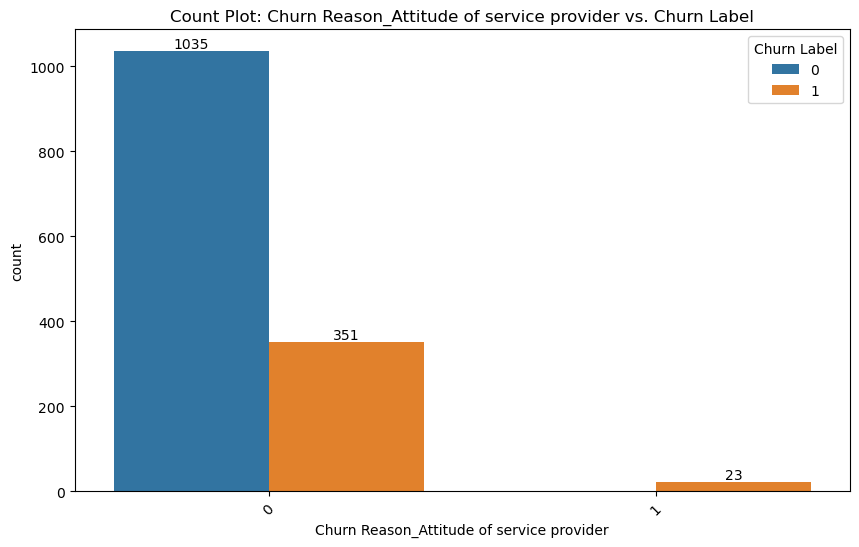

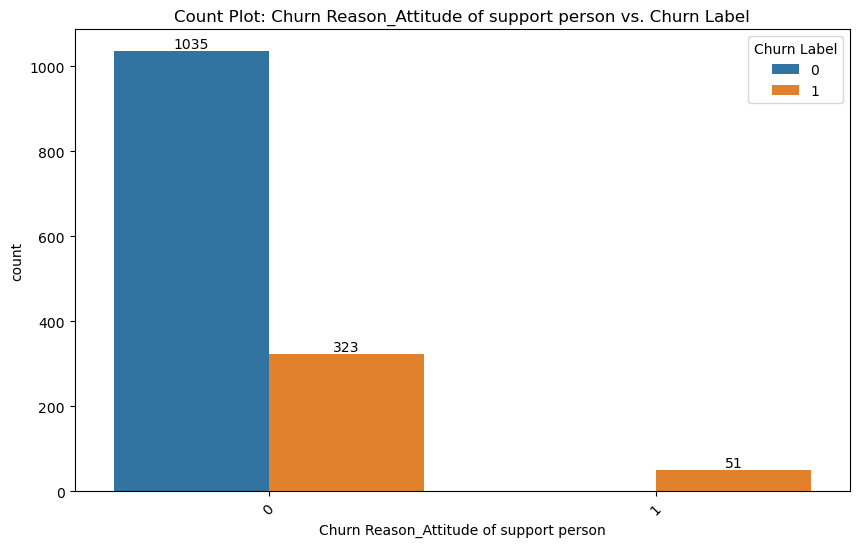

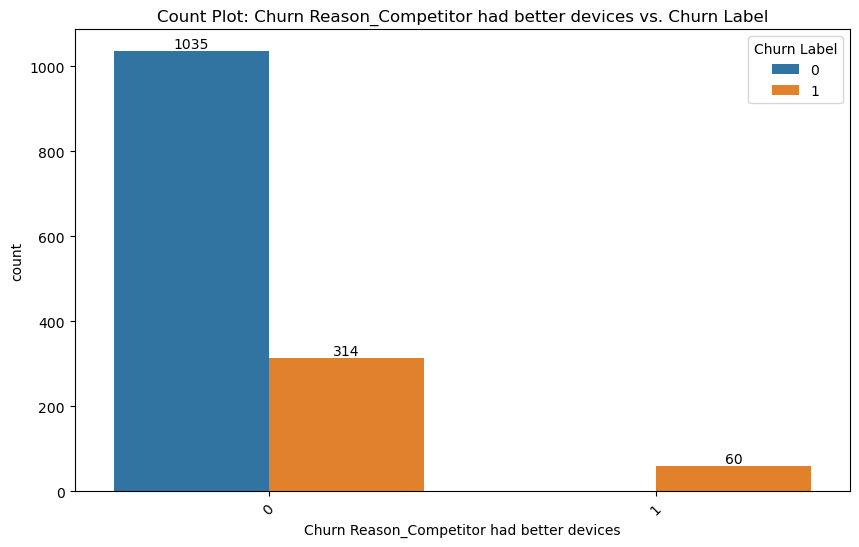

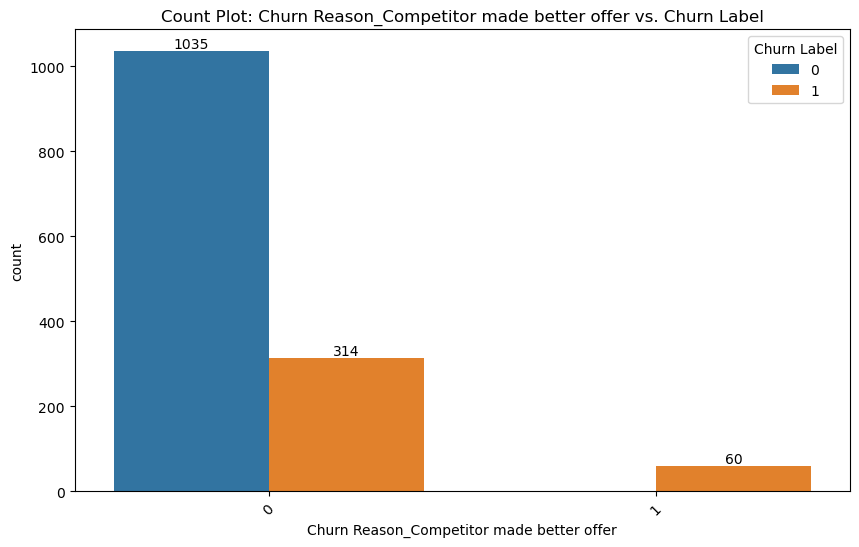

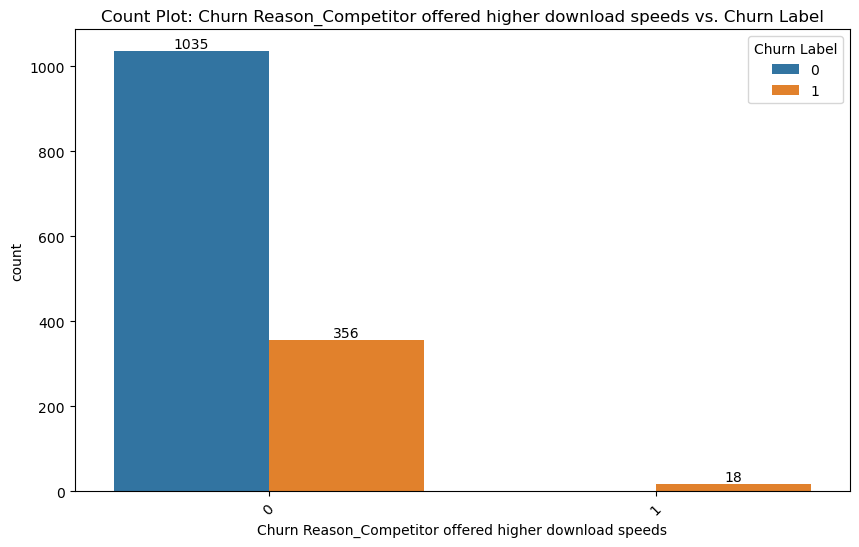

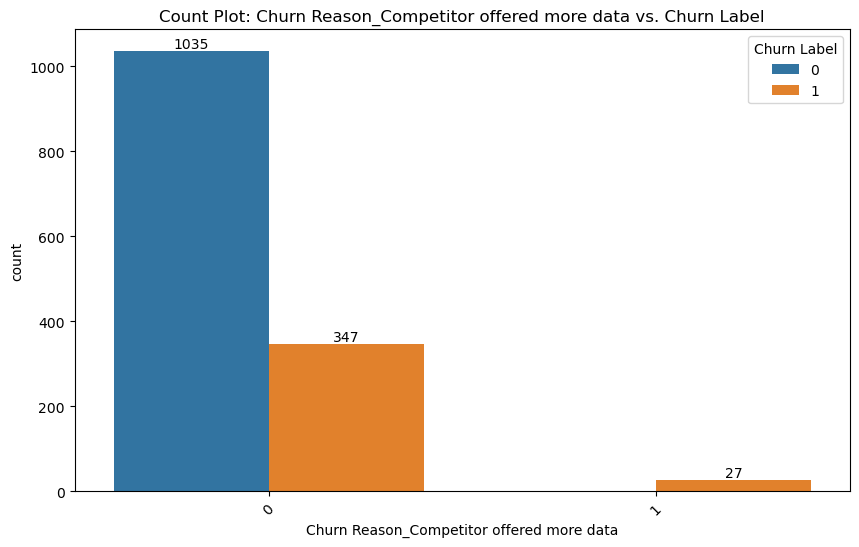

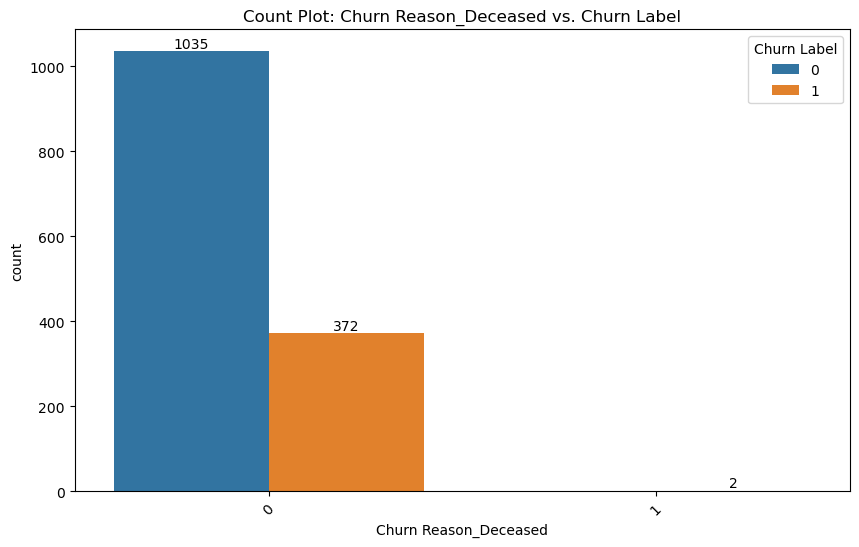

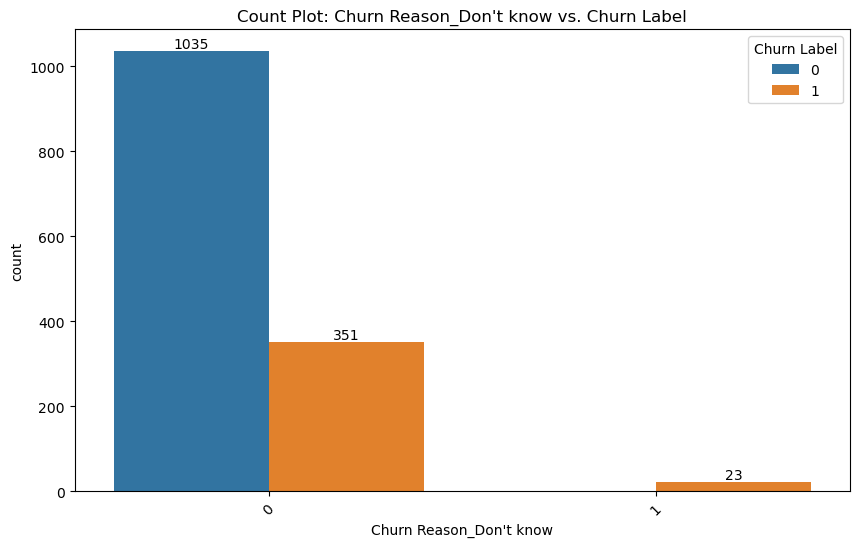

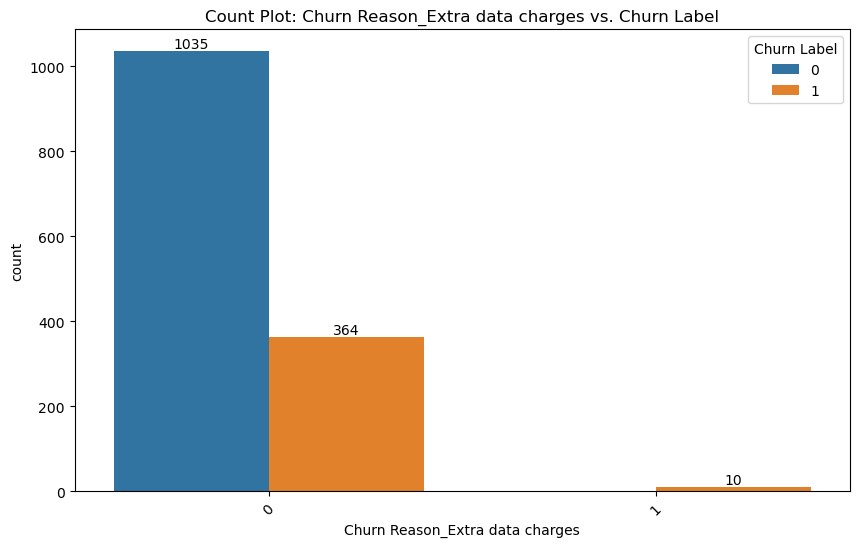

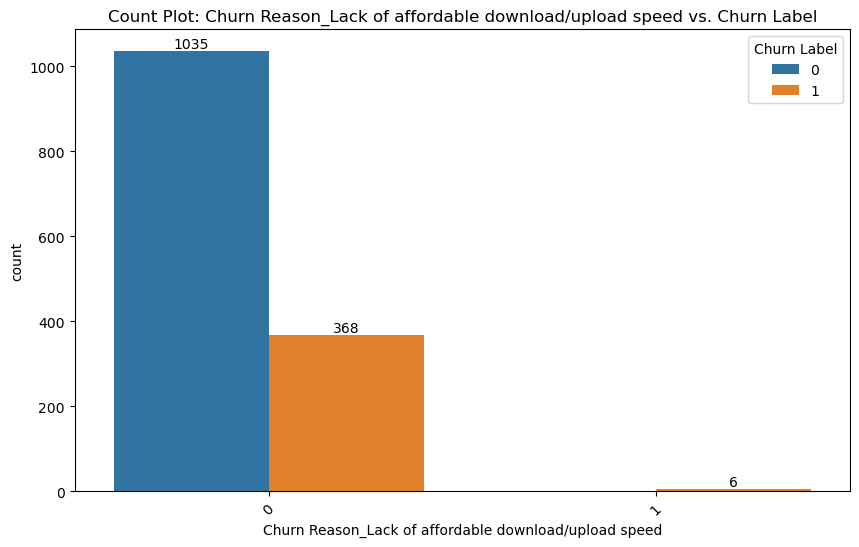

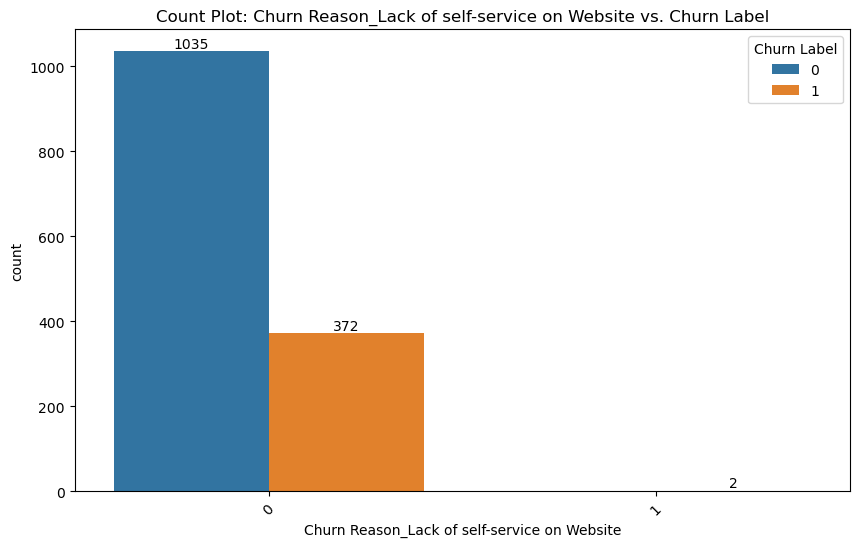

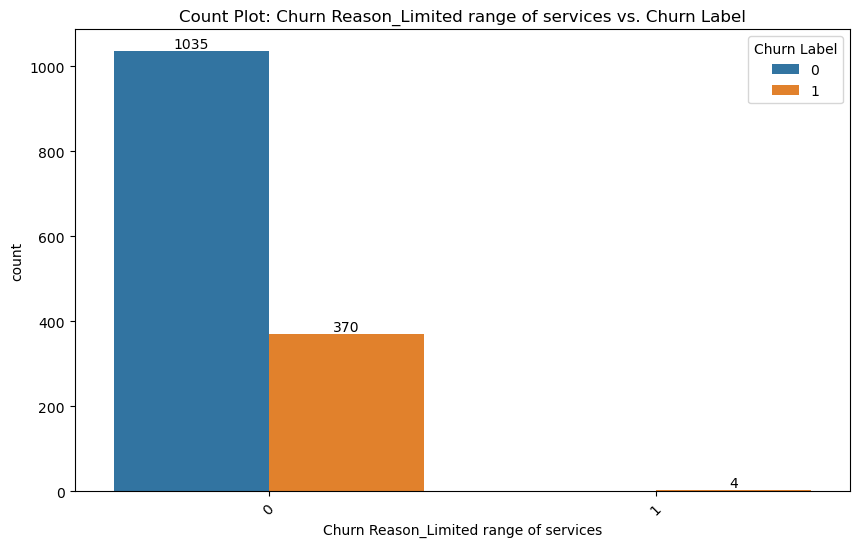

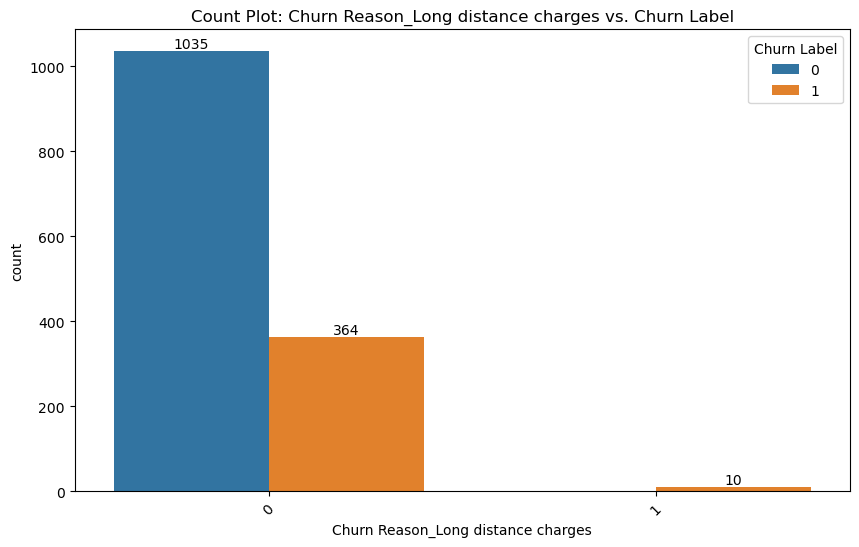

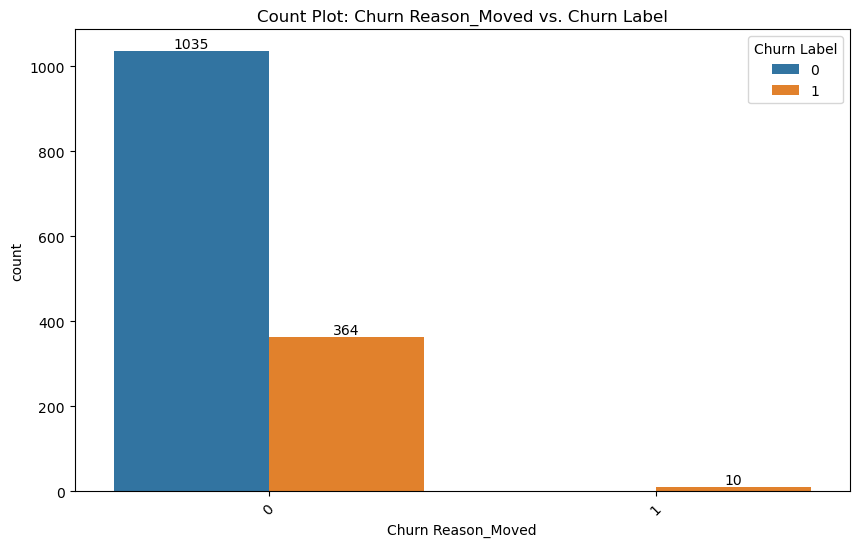

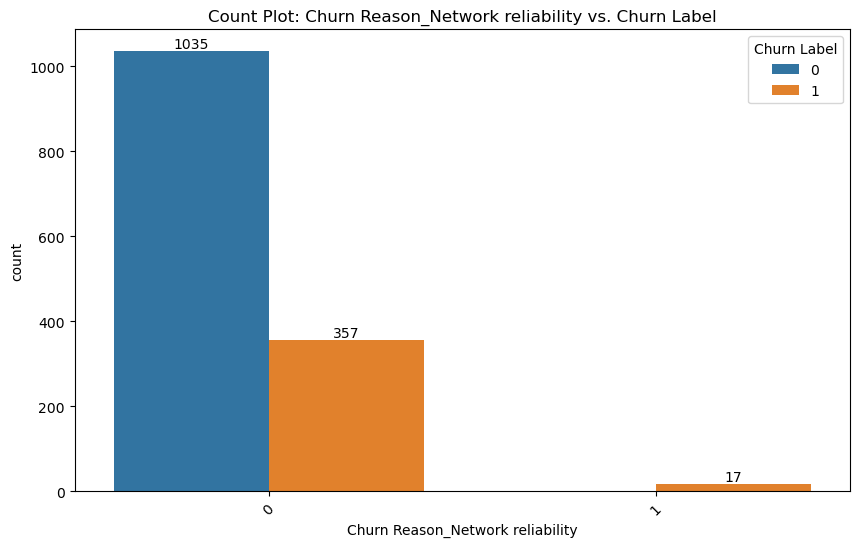

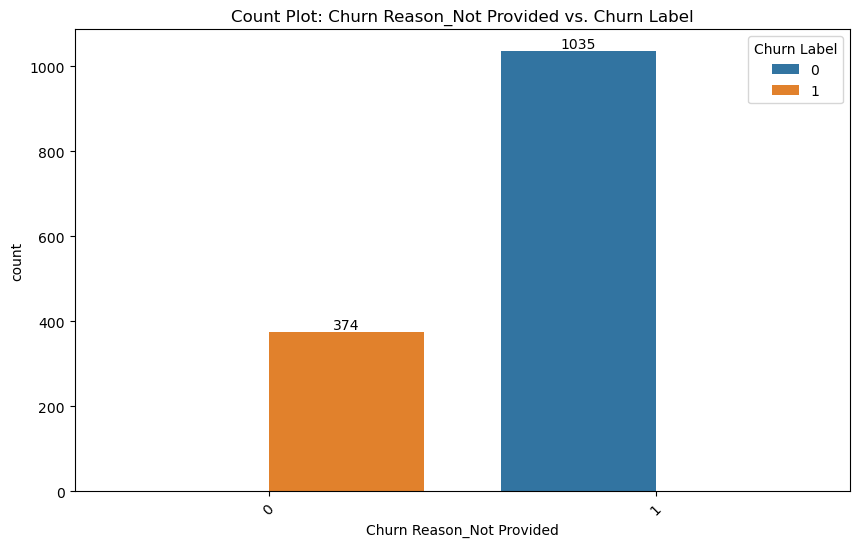

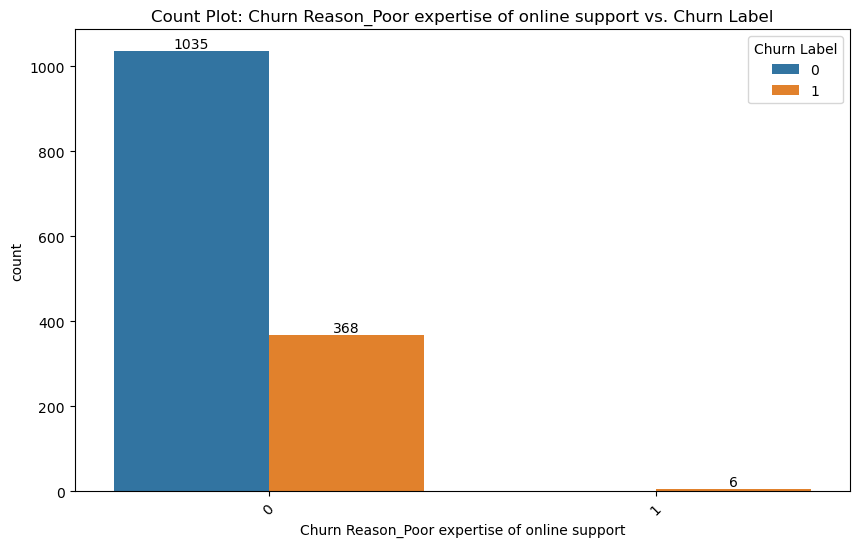

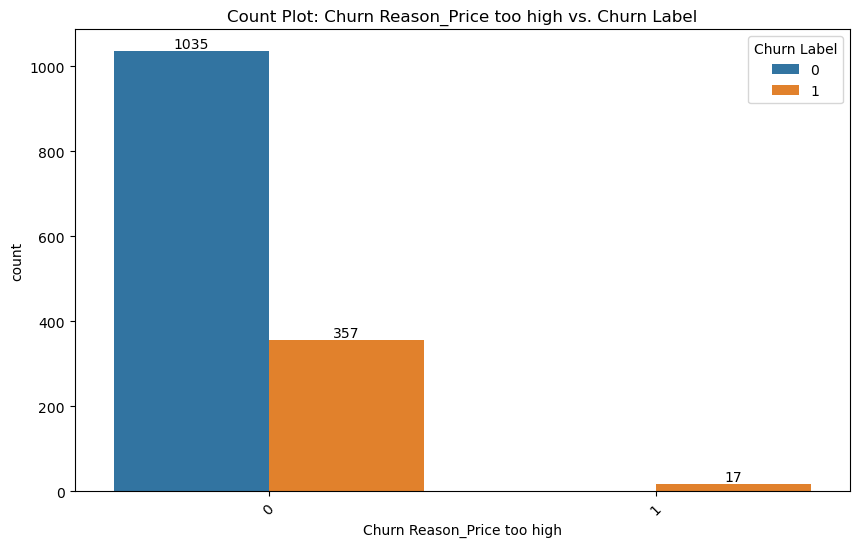

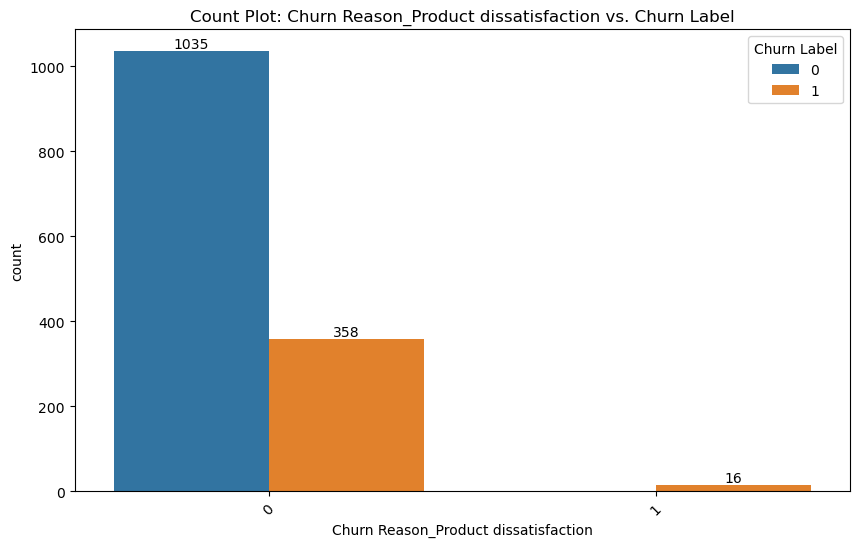

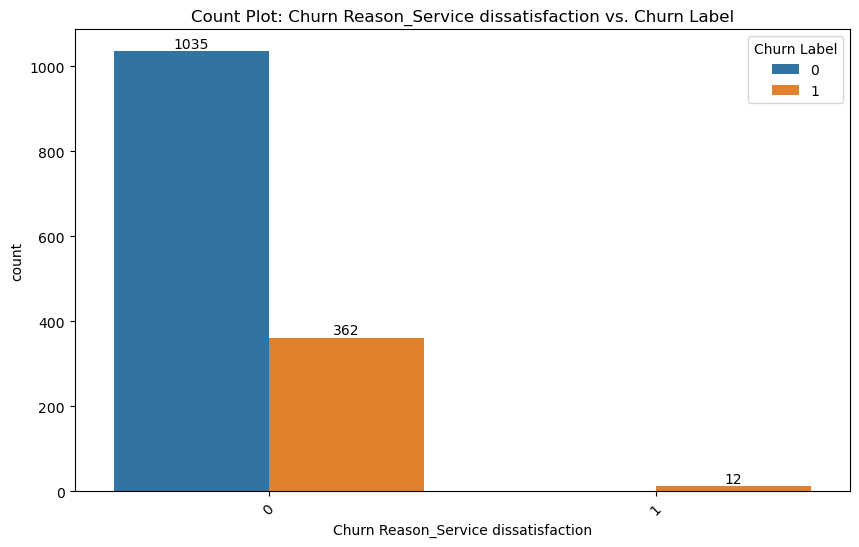

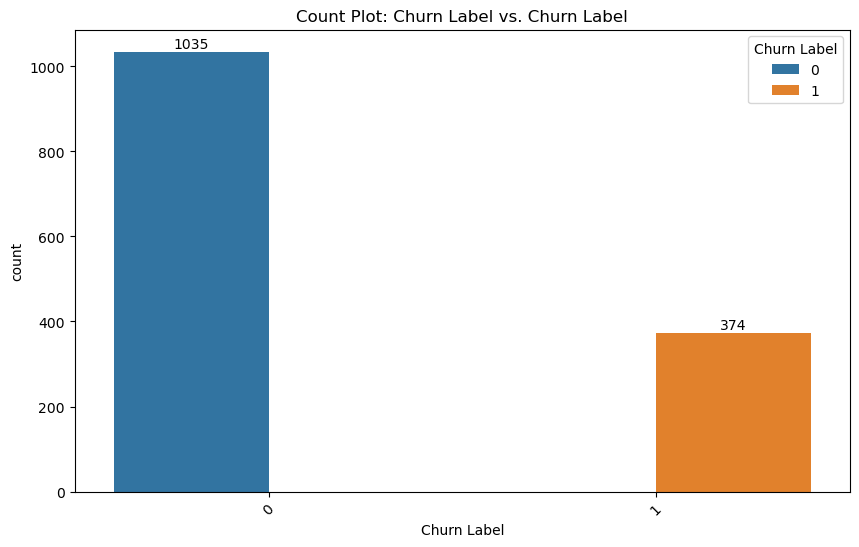

In [23]:
from matplotlib.ticker import FuncFormatter
# DataFrame `train_data` that includes both X_train and y_train
test_data = pd.concat([X_test, y_test], axis=1)

# Initialize lists to store column names
one_hot_encoded_cols = []
label_encoded_cols = []

# Loop through all columns in the DataFrame
for col in test_data.columns:
    if test_data[col].dtype == 'int64' or test_data[col].dtype == 'float64':
        unique_values = test_data[col].nunique()
        
        # Identify one-hot encoded columns (binary columns with only two unique values)
        if unique_values == 2 and set(test_data[col].unique()) <= {0, 1}:
            one_hot_encoded_cols.append(col)
        # Identify label encoded columns (categorical columns with a limited number of unique integer values)
        elif unique_values < 20:  # Adjust threshold based on your understanding of the data
            label_encoded_cols.append(col)

# Now plot the bivariate analysis using identified columns

# Function to format the x-axis labels
def custom_format(x, pos):
    if x == 0 or x == 1:
        return f'{int(x)}'  # Remove decimal for 0 and 1
    else:
        return f'{x:.2f}'  # Format other numbers to 2 decimal places

    
# Plot for Label Encoded Columns
for col in label_encoded_cols:
    if col != 'Churn Label':  # Skip target column
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=test_data, x=col, hue='Churn Label')
        ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge')
        plt.title(f'Count Plot: {col} vs. Churn Label')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Plot for One-Hot Encoded Columns
for col in one_hot_encoded_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=test_data, x=col, hue='Churn Label')
    ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    plt.title(f'Count Plot: {col} vs. Churn Label')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Model Creation

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
    random_state=42            # Ensure reproducibility
)

# Step 2: Fit the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_test_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Optional: Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Test Accuracy: 1.0
Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Random Forest Confusion Matrix:
[[1035    0]
 [   0  374]]


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Step 1: Convert target labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target and transform both training and test targets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,          # Number of trees
    max_depth=4,               # Maximum depth of each tree
    learning_rate=0.1,         # Step size shrinkage used to prevent overfitting
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42,           # Ensure reproducibility
    use_label_encoder=False,   # To avoid label encoder warning in recent versions
    eval_metric='logloss'      # Evaluation metric
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred_xgb = xgb_model.predict(X_test)

# Decode the predicted labels to original label names ('No', 'Yes')
y_test_pred_xgb_decoded = label_encoder.inverse_transform(y_test_pred_xgb)

# Evaluate the model
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb_decoded))
print("XGBoost Test Classification Report:")
print(classification_report(y_test, y_test_pred_xgb_decoded))

# Optional: Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb_decoded)
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)

XGBoost Test Accuracy: 1.0
XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

XGBoost Confusion Matrix:
[[1035    0]
 [   0  374]]


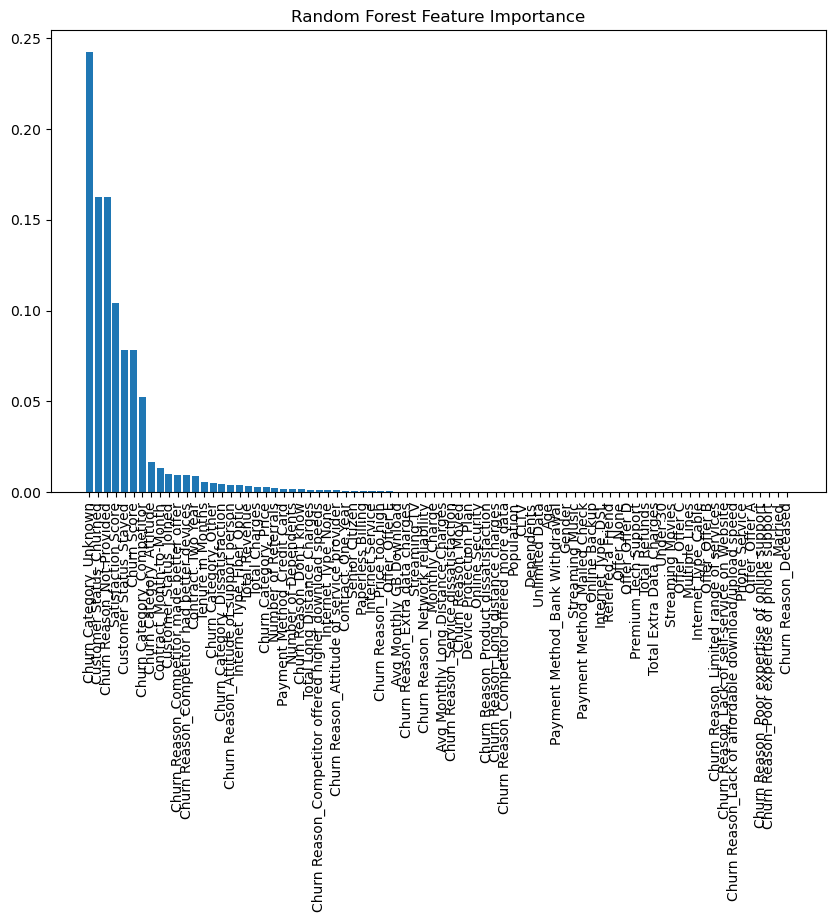

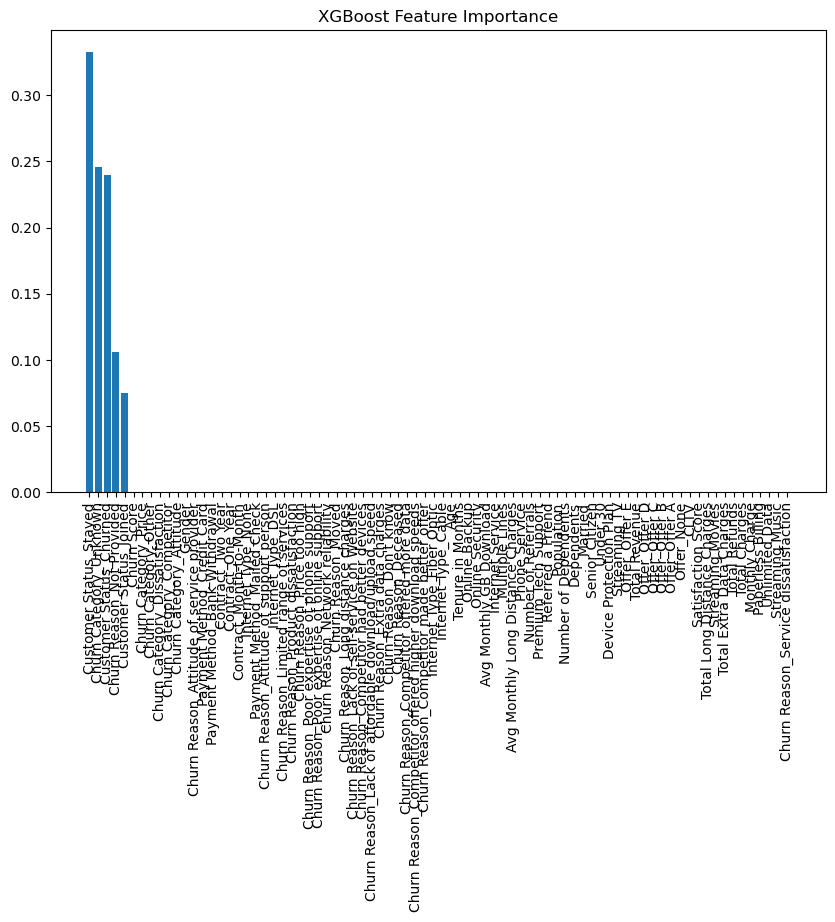

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# Feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
features = X_train.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importance})
importance_df_rf.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance for XGBoost
xgb_feature_importance = xgb_model.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importance})
importance_df_xgb.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.xticks(rotation=90)
plt.title('XGBoost Feature Importance')
plt.show()

# Summary 

1. The following cities have been identified as having the highest customer churn rates:
Eldridge          
Smith River       
Twain             
Johannesburg      
Riverbank <br>
Wrightwood <br>
Boulder Creek <br>
South Lake Tahoe <br>
San Dimas <br>
Acampo <br>

Actionable Insight: These cities should be prioritized for targeted customer retention strategies, such as personalized offers, enhanced customer service, and proactive engagement to prevent further churn.
  
2. Two specific promotional offers have been found to significantly reduce the churn rate:

* Offer A: Reduces churn by 93%.
* Offer B: Reduces churn by 88%. 
<br>

Recommendation: These offers should be expanded and targeted at at-risk customers, particularly in regions with high churn rates, to further decrease customer attrition. It may also be beneficial to explore variations of these offers to maximize customer retention across different segments.

3. The primary reason customers are leaving is due to the perception that competitors provide better devices. Secondary reasons include:
* Competitor made a better offer.
* Negative customer support experience, specifically related to the attitude of support personnel.
<br>

Recommendation: To address these issues, the company should consider:
   * Improving device offerings to remain competitive in the market.
   * Revisiting pricing and offer structures to ensure they are competitive with rival firms.
   * Enhancing customer support training, with a focus on improving the customer experience and addressing the support team's attitude and responsiveness.

##### Lastly the feature importance graphs from both the models imply that churn category and churn reason are the two columns that is leading to data leakage and that is the reason why we are getting a 100% accuracy on test as well as train data which means overfitting o neither one of our models.

---